### 파일이 너무 커 다시 실행하는 과정에서 오류가 있습니다

# 파일 불러오기

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.options.display.float_format = '{:.2f}'.format
plt.rc('font', family='Malgun Gothic')

In [2]:
Nov_19 = pd.read_csv('archive/2019-Nov.csv')
Dec_19 = pd.read_csv('archive/2019-Dec.csv')
Oct_19 = pd.read_csv('archive/2019-Oct.csv')
Feb_20 = pd.read_csv('archive/2020-Feb.csv')
Jan_20 = pd.read_csv('archive/2020-Jan.csv')

In [3]:
df = pd.concat([Nov_19, Dec_19, Oct_19, Feb_20, Jan_20], axis=0)

In [ ]:
# df.to_csv('cosmetics_df.csv')
df = pd.read_csv('cosmetics_df.csv', index_col=0)

# EDA & 전처리

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20692840 entries, 0 to 4264751
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.5+ GB


In [6]:
df.isna().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    20339246
brand             8757117
price                   0
user_id                 0
user_session         4598
dtype: int64

## event_type

In [7]:
df['event_type'].value_counts()

view                9657821
cart                5768333
remove_from_cart    3979679
purchase            1287007
Name: event_type, dtype: int64

<AxesSubplot:ylabel='event_type'>

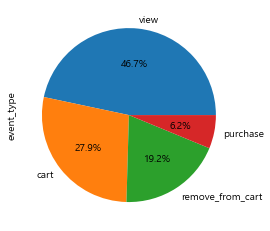

In [8]:
df['event_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

## product_id

In [9]:
df['product_id'].nunique()

54571

In [10]:
df['product_id'].to_frame()

,product_id
0,5802432
1,5844397
2,5837166
3,5876812
4,5826182
...,...
4264747,5886774
4264748,5886774
4264749,5875432
4264750,5820745


In [11]:
print(df[df['product_id']==5809910]['brand'].value_counts())
print(df[df['product_id']==5809911]['brand'].value_counts())
print(df[df['product_id']==5809912]['brand'].value_counts())
print(df[df['product_id']==5809913]['brand'].value_counts())

grattol    141590
Name: brand, dtype: int64
grattol    36136
Name: brand, dtype: int64
grattol    55560
Name: brand, dtype: int64
grattol    3566
Name: brand, dtype: int64


## category_id

In [12]:
df['category_id'].nunique()

525

In [13]:
df['category_id'].value_counts()

1487580007675986893    1062716
1487580005595612013     789465
1487580005092295511     770985
1487580005671109489     680648
1487580006317032337     646704
                        ...   
1487580005159404378          2
1487580009890578479          1
1487580010897211483          1
1487580011056595041          1
1487580009706029097          1
Name: category_id, Length: 525, dtype: int64

## category_code

In [14]:
df.groupby(['category_code', 'category_id']).size().to_frame().rename(columns = {0:'count'})

count
category_code                          category_id                
accessories.bag                        1487580010695884882   24253
accessories.cosmetic_bag               1921723506584715388    3644
apparel.glove                          1487580012071616651     684
                                       2007399943458784057   51891
appliances.environment.air_conditioner 1487580008221246441      87
                                       1783999067181810204     621
appliances.environment.vacuum          1487580006350586771  149168
appliances.personal.hair_cutter        1487580008070251489    5384
appliances.personal.massager           2235524499216793855    3296
furniture.bathroom.bath                1487580011970953351    9047
                                       1487580012147114126     864
                                       1487580012759482531     410
                                       2018287324474901238    3606
                                       2193074740686488401   10004
furniture.living_room.cabinet          2193074740619379535   30560
furniture.living_room.chair            2022622168218599898     343
sport.diving                           1487580012549767321       4
stationery.cartrige                    1487580013053083824   59728

In [15]:
df['category_code'].value_counts()

appliances.environment.vacuum             149168
stationery.cartrige                        59728
apparel.glove                              52575
furniture.living_room.cabinet              30560
accessories.bag                            24253
furniture.bathroom.bath                    23931
appliances.personal.hair_cutter             5384
accessories.cosmetic_bag                    3644
appliances.personal.massager                3296
appliances.environment.air_conditioner       708
furniture.living_room.chair                  343
sport.diving                                   4
Name: category_code, dtype: int64

([<matplotlib.patches.Wedge at 0x24a3b36a1c0>,
 [Text(-1.0984153685035563, 0.05902269254445034, 'NULL'),
  Text(1.0984153664312668, -0.05902273110985136, 'NOT NULL')],
 [Text(-0.5991356555473942, 0.03219419593333654, '98.3%'),
  Text(0.5991356544170546, -0.03219421696900983, '1.7%')])

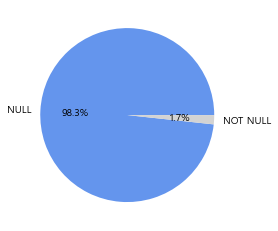

In [16]:
plt.pie(df['category_code'].isna().value_counts(), labels=['NULL', 'NOT NULL'], colors=['cornflowerblue', 'lightgrey'], autopct='%1.1f%%')

## brand

([<matplotlib.patches.Wedge at 0x24a3b3ad8b0>,
 [Text(-0.2628492100099901, 1.0681340237990382, 'NOT NULL'),
  Text(0.26284911000406436, -1.0681340484087525, 'NULL')],
 [Text(-0.1433722963690855, 0.582618558435839, '57.7%'),
  Text(0.1433722418203987, -0.5826185718593195, '42.3%')])

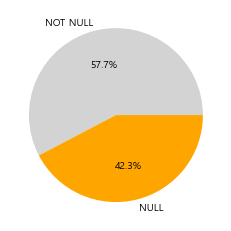

In [17]:
plt.pie(df['brand'].isna().value_counts(), labels=['NOT NULL', 'NULL'], colors=['lightgrey','orange'], autopct='%1.1f%%')

In [18]:
df['brand'].value_counts()

runail       1528908
irisk        1033852
masura        861763
grattol       852591
bpw.style     434813
              ...   
shifei             9
vl-gel             7
dessata            6
gena               3
pueen              1
Name: brand, Length: 273, dtype: int64

In [19]:
df.groupby('brand').median()['price'].sort_values(ascending=False).to_frame().head(20)

,price
brand,
strong,194.44
marathon,137.78
sanoto,125.40
dorena,113.90
s.care,103.17
kosmekka,98.81
sun,82.38
max,79.21
babyliss,75.25


In [20]:
df[df['brand'] == 'strong'].sort_values('price', ascending=False).head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
3216490,2020-02-23 13:21:19 UTC,view,5906221,1487580006300255120,NaN,strong,327.78,484563211,c4e28d3b-a3aa-4d3b-9f30-1942ab39e467
1850869,2019-12-15 07:44:50 UTC,view,5906221,1487580006300255120,NaN,strong,327.78,587148478,8d3d95d3-bb5f-4d5a-8d35-ee4c48fb9fd9
3239931,2020-01-25 11:42:21 UTC,view,5906221,1487580006300255120,NaN,strong,327.78,605884016,caa3172d-7c59-46e8-b78f-37ae9270f830
3337124,2019-12-28 17:38:57 UTC,view,5906221,1487580006300255120,NaN,strong,327.78,230911992,239de593-63af-42eb-973e-53d938be50d1
3510155,2020-02-25 14:00:05 UTC,view,5906221,1487580006300255120,NaN,strong,327.78,609381659,23fc56a3-08ef-4b62-90e0-e54276c98ae5


In [21]:
df[df['event_type'] == 'purchase'].groupby('brand').sum()['price'].sort_values(ascending=False).to_frame().head(20)

c:\users\user\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


,price
brand,
runail,343433.19
grattol,266295.94
irisk,223903.38
uno,190719.46
strong,151941.80
masura,139764.86
jessnail,134775.04
ingarden,124606.04
estel,121788.76


In [20]:
df.groupby(['product_id', 'brand']).size().reset_index().groupby('product_id').size().sort_values()

product_id
3752       1
5857088    1
5857086    1
5857085    1
5857084    1
          ..
37072      2
5834352    2
5826561    2
5876802    2
5877001    2
Length: 31098, dtype: int64

In [25]:
df[df['product_id'] == 37072].groupby(['product_id', 'brand']).size().to_frame()

0
product_id brand      
37072      candy   145
           runail  183

In [51]:
df[df['product_id'] == 5898265][['product_id', 'brand']].head(6)

,product_id,brand
1501274,5898265,opi
1558660,5898265,opi
2341206,5898265,opi
2604229,5898265,opi
2743748,5898265,opi
3695520,5898265,NaN


In [52]:
id_brand_df = (df.groupby(['product_id', 'brand']).size().reset_index().groupby('product_id').size() != 1).to_frame()

In [53]:
df = df[~df['product_id'].isin(id_brand_df[id_brand_df[0] == True].index.tolist())]

MemoryError: Unable to allocate 473. MiB for an array with shape (3, 20686741) and data type int64

In [ ]:
df = df.sort_values(['product_id', 'brand'])
df['brand'].fillna(method='ffill', inplace=True)

In [25]:
df.isna().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    20333147
brand                   0
price                   0
user_id                 0
user_session         4597
dtype: int64

## price

<AxesSubplot:ylabel='Frequency'>

c:\users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


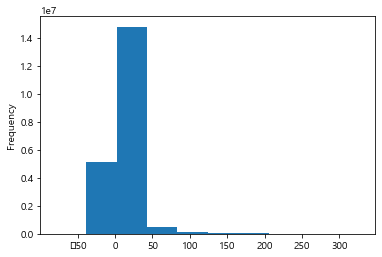

In [26]:
df['price'].plot(kind='hist')

In [27]:
df = df[df['price'] >= 0]

<AxesSubplot:ylabel='Frequency'>

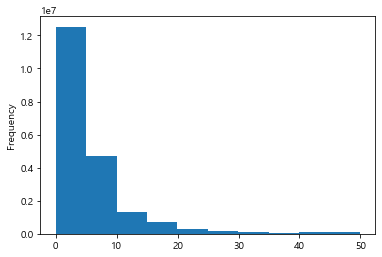

In [28]:
df[df['price']<50]['price'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

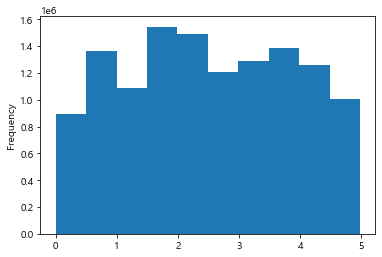

In [29]:
df[df['price']<5]['price'].plot(kind='hist')

In [30]:
df.groupby(['category_id']).median()['price'].sort_values(ascending=False).to_frame().head(10)

,price
category_id,
2222113024708182273,166.67
2187686850687140020,125.40
2022622168218599898,106.67
2193074740619379535,98.41
1487580006300255120,79.35
1487580006174425994,71.27
1487580008028308447,61.11
1487580008053474272,57.14
1487580008070251489,55.56


In [31]:
df.groupby(['category_id', 'category_code']).median()['price'].sort_values(ascending=False).to_frame().head()

,,price
category_id,category_code,
2022622168218599898,furniture.living_room.chair,106.67
2193074740619379535,furniture.living_room.cabinet,98.41
1487580008070251489,appliances.personal.hair_cutter,55.56
2193074740686488401,furniture.bathroom.bath,54.76
1487580006350586771,appliances.environment.vacuum,48.41


In [32]:
id_price_df = (df.groupby(['product_id', 'price']).size().groupby('product_id').size() != 1).to_frame()

In [33]:
id_price_list = id_price_df[id_price_df[0] == True].index.tolist()

In [34]:
for product in id_price_list:
    max_price = df[df['product_id'] == product]['price'].max()
    df.loc[df['product_id'] == product, 'max_price'] = max_price

In [35]:
drop_product_list = df[(df['price'] == 0) & (df['max_price'].isnull())]['product_id'].unique().tolist()

In [36]:
len(drop_product_list)

662

In [37]:
df = df.drop(df[df['product_id'].isin(drop_product_list)].index)

In [38]:
df.loc[df['price'] == 0, 'price'] = df.loc[df['price'] == 0, 'max_price']

In [39]:
df['max_price'] = df['max_price'].fillna(df['price'])

## user_id

In [40]:
df['user_id'].info()

<class 'pandas.core.series.Series'>
Int64Index: 20673866 entries, 1047900 to 3970992
Series name: user_id
Non-Null Count     Dtype
--------------     -----
20673866 non-null  int64
dtypes: int64(1)
memory usage: 315.5 MB


In [41]:
df[df['event_type'] == 'purchase']['user_id'].value_counts().to_frame().rename(columns={'user_id' : '구매 횟수'})

,구매 횟수
480463194,715
469299888,602
556579890,505
381816972,500
601469771,461
...,...
588942158,1
591320161,1
480677099,1
591689976,1


## user_session

In [42]:
df[df['user_session'] == 'a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47'].sort_values('event_time').reset_index(drop=True)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,max_price
0,2020-01-31 23:58:43 UTC,cart,5795702,1487580009387261981,NaN,tertio,7.78,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,7.78
1,2020-01-31 23:59:25 UTC,cart,5665851,1487580006509970331,NaN,konad,1.90,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,1.90
2,2020-01-31 23:59:43 UTC,remove_from_cart,5751422,1487580005268456287,NaN,uno,10.95,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,10.95
3,2020-01-31 23:59:43 UTC,remove_from_cart,5751422,1487580005268456287,NaN,uno,10.95,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,10.95
4,2020-01-31 23:59:52 UTC,remove_from_cart,5886774,1487580006317032337,NaN,runail,1.59,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,1.59
5,2020-01-31 23:59:52 UTC,remove_from_cart,5886774,1487580006317032337,NaN,runail,1.59,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,1.59
6,2020-01-31 23:59:57 UTC,remove_from_cart,5820745,1487580006317032337,NaN,i-laq,2.22,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,2.22
7,2020-01-31 23:59:58 UTC,remove_from_cart,5820745,1487580006317032337,NaN,i-laq,2.22,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,2.22
8,2020-02-01 00:00:14 UTC,remove_from_cart,5790563,1487580008263189483,NaN,orly,7.14,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,7.14
9,2020-02-01 00:00:14 UTC,remove_from_cart,5790563,1487580008263189483,NaN,orly,7.14,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,7.14


([<matplotlib.patches.Wedge at 0x24a3b70fa30>,
 [Text(-1.0999997319755381, 0.0007678891484433426, ''),
  Text(1.099999731991932, -0.0007678656640427354, 'NULL')],
 [Text(-0.5999998538048389, 0.00041884862642364135, '99.977779388%'),
  Text(0.599999853813781, -0.00041883581675058285, '0.022221291%')])

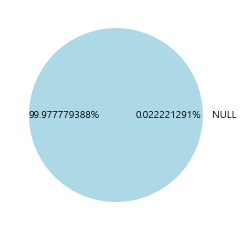

In [43]:
plt.pie(df['user_session'].isna().value_counts(), labels=['', 'NULL'], colors=['lightblue', 'lightgrey'], autopct='%1.9f%%')

In [44]:
df = df.dropna(subset=['user_session'])

## promotion / discount / blackFriday 열 추가 & CSV 파일 저장

In [45]:
promotion_product = (df.groupby(['product_id', 'price']).size().groupby('product_id').size() != 1).to_frame()

In [46]:
promotion_list = promotion_product[promotion_product[0]==True].index.tolist()

In [47]:
len(promotion_list)

34949

In [48]:
for product in promotion_list:
    max_price = df.loc[df['product_id'] == product, 'price'].max()
    df.loc[df['product_id'] == product, 'promotion'] = (df.loc[df['product_id'] == product, 'price'] != max_price).astype(int)

In [49]:
df['promotion'].value_counts()

0.00    15910837
1.00     2855504
Name: promotion, dtype: int64

In [50]:
df['promotion'] = df['promotion'].fillna(0)

In [51]:
df['promotion'].value_counts()

0.00    17813768
1.00     2855504
Name: promotion, dtype: int64

In [52]:
df['discount'] = 100 - (df['price']/df['max_price']*100)

In [268]:
# 21~24일, 28일~30일
df.loc[((df['event_time_day'] >= '2019-11-21') & (df['event_time_day'] <= '2019-11-24')) | ((df['event_time_day'] <= '2019-11-30') & (df['event_time_day'] >= '2019-11-28')), 'bfday'] = 1
df['bfday'] = df['bfday'].fillna(0)

In [269]:
df['bfday'].value_counts()

0.00    19179690
1.00     1489582
Name: bfday, dtype: int64

In [270]:
# df.to_csv('preprocessing_cosmetics_df.csv')

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

pd.options.display.float_format = '{:.2f}'.format
plt.rc('font', family='Malgun Gothic')

In [ ]:
df = pd.read_csv('preprocessing_cosmetics_df.csv', index_col=0)

## 전처리 후 데이터의 EDA

In [7]:
df

,event_time,event_type,product_id,category_id,...,discount,event_time_month,event_time_day,bfday
1047900,2019-11-08 11:13:34+00:00,view,3752,1487580005411062629,...,0.00,2019-11,2019-11-08,0.00
1227754,2019-11-09 17:26:06+00:00,view,3752,1487580005411062629,...,0.00,2019-11,2019-11-09,0.00
1497847,2019-11-11 19:01:20+00:00,view,3752,1487580005411062629,...,0.00,2019-11,2019-11-11,0.00
2098653,2019-11-16 13:10:54+00:00,view,3752,1487580005411062629,...,0.00,2019-11,2019-11-16,0.00
2239798,2019-11-17 16:50:51+00:00,view,3752,1487580005411062629,...,0.00,2019-11,2019-11-17,0.00
...,...,...,...,...,...,...,...,...,...
4147455,2020-02-29 21:24:36+00:00,view,5932585,1487580008800059394,...,0.00,2020-02,2020-02-29,0.00
4147548,2020-02-29 21:25:18+00:00,view,5932585,1487580008800059394,...,0.00,2020-02,2020-02-29,0.00
4152274,2020-02-29 22:11:49+00:00,view,5932585,1487580008800059394,...,0.00,2020-02,2020-02-29,0.00
3970337,2020-02-28 15:33:07+00:00,view,5932585,1487580008800059394,...,0.00,2020-02,2020-02-28,0.00


In [242]:
df.groupby('product_id').mean()['max_price'].describe()

count   53879.00
mean        8.06
std        12.72
min         0.08
25%         2.70
50%         4.76
75%         8.41
max       327.78
Name: max_price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

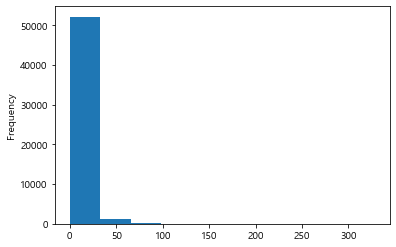

In [5]:
df.groupby('product_id').mean()['max_price'].plot(kind='hist')

<AxesSubplot:>

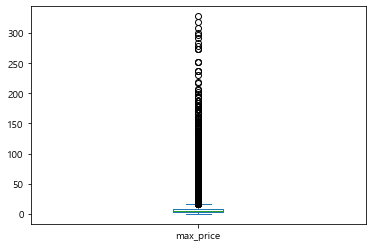

In [6]:
df.groupby('product_id').mean()['max_price'].plot(kind='box')

In [46]:
df.groupby('product_id').mean()['promotion'].value_counts()[0]

18930

In [7]:
no_promo_product_num = df.groupby('product_id').mean()['promotion'].value_counts()[0]
promo_product_num = df['product_id'].nunique() - no_promo_product_num

<AxesSubplot:title={'center':'프로모션 상품 비율'}, ylabel='promotion'>

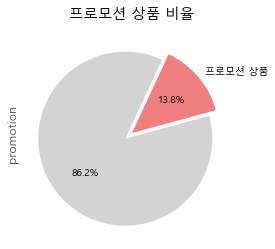

In [67]:
explode = (0.1, 0)  # 첫 번째 조각을 약간 떼어냄

# 파이차트 그리기
promotion_counts.plot(kind='pie', labels=['', '프로모션 상품'],colors=['lightgrey', 'lightcoral'], autopct='%1.1f%%', startangle=65, explode=explode, title='프로모션 상품 비율')

In [9]:
df[df['discount'] != 0].groupby('product_id').mean()['discount'].describe()

count   34949.00
mean       13.54
std        10.40
min         0.20
25%         7.37
50%        10.25
75%        15.21
max        92.18
Name: discount, dtype: float64

<AxesSubplot:ylabel='Frequency'>

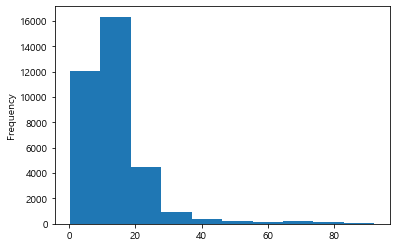

In [10]:
df[df['discount'] != 0].groupby('product_id').mean()['discount'].plot(kind='hist')

<AxesSubplot:>

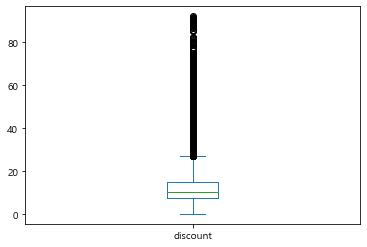

In [11]:
df[df['discount'] != 0].groupby('product_id').mean()['discount'].plot(kind='box')

In [12]:
df[df['product_id'] == (df[df['discount'] == df['discount'].max()]['product_id'].unique()[0])].sort_values('price', ascending=False)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,max_price,promotion,discount
815226,2019-12-07 10:20:50 UTC,view,10115,1487580012717539489,NaN,opi,5.70,578981308,08db9988-c696-4455-8631-c8e6895e85c3,5.70,0.00,0.00
811342,2019-12-07 09:46:22 UTC,view,10115,1487580012717539489,NaN,opi,5.70,578981308,08db9988-c696-4455-8631-c8e6895e85c3,5.70,0.00,0.00
609220,2019-12-05 14:16:07 UTC,remove_from_cart,10115,1487580012717539489,NaN,opi,5.70,563193272,a4fe361b-8d23-4f58-96ee-5d59e8edcb54,5.70,0.00,0.00
609221,2019-12-05 14:16:07 UTC,remove_from_cart,10115,1487580012717539489,NaN,opi,5.70,563193272,a4fe361b-8d23-4f58-96ee-5d59e8edcb54,5.70,0.00,0.00
697306,2019-12-06 09:22:16 UTC,view,10115,1487580012717539489,NaN,opi,5.70,582811636,694205aa-fbbf-4da9-b23c-cf55b4895ac0,5.70,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2079792,2020-02-14 20:05:26 UTC,view,10115,1487580012717539489,NaN,opi,0.27,610548660,319754b9-ecf4-4f26-89c6-0d8c8c6174dd,5.70,1.00,95.26
2079302,2020-02-14 20:01:07 UTC,cart,10115,1487580012717539489,NaN,opi,0.27,530911673,66a18ec6-0e5f-4cac-a880-6b73fa654b6d,5.70,1.00,95.26
2079285,2020-02-14 20:01:01 UTC,cart,10115,1487580012717539489,NaN,opi,0.27,530911673,66a18ec6-0e5f-4cac-a880-6b73fa654b6d,5.70,1.00,95.26
2025426,2020-02-14 11:47:42 UTC,view,10115,1487580012717539489,NaN,opi,0.27,594559565,b0ffb0db-0471-4816-be81-161d9ab5cf0e,5.70,1.00,95.26


In [23]:
df[df['promotion']== 1].sort_values('event_time')

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,max_price,promotion,discount,event_time_month,event_time_day,bfday
8,2019-10-01 00:00:25+00:00,cart,5698989,1487580006317032337,NaN,eos,1.27,385985999,d30965e8-1101-44ab-b45d-cc1bb9fae694,1.59,1.00,20.13,2019-10,2019-10-01,0.00
11,2019-10-01 00:00:28+00:00,remove_from_cart,5834172,1487580013522845895,NaN,runail,0.95,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,1.59,1.00,40.25,2019-10,2019-10-01,0.00
69,2019-10-01 00:01:46+00:00,view,5597836,1487580005713052531,NaN,ingarden,3.90,520558067,d3bb9ae8-192b-4d0c-9451-60cbeb5107c9,13.02,1.00,70.05,2019-10,2019-10-01,0.00
74,2019-10-01 00:02:08+00:00,cart,5597836,1487580005713052531,NaN,ingarden,3.90,520558067,d3bb9ae8-192b-4d0c-9451-60cbeb5107c9,13.02,1.00,70.05,2019-10,2019-10-01,0.00
80,2019-10-01 00:02:18+00:00,view,5597836,1487580005713052531,NaN,ingarden,3.90,520558067,d3bb9ae8-192b-4d0c-9451-60cbeb5107c9,13.02,1.00,70.05,2019-10,2019-10-01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156636,2020-02-29 23:57:39+00:00,remove_from_cart,5826580,1897124469017673788,NaN,solomeya,4.16,607916558,002226f7-7ff3-459f-b941-600c505709ae,5.56,1.00,25.18,2020-02,2020-02-29,0.00
4156661,2020-02-29 23:58:52+00:00,view,5831837,1911999801642189621,NaN,solomeya,3.44,607916558,002226f7-7ff3-459f-b941-600c505709ae,4.60,1.00,25.22,2020-02,2020-02-29,0.00
4156663,2020-02-29 23:58:57+00:00,view,5815665,1487580006317032337,NaN,rosi,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,0.67,1.00,11.94,2020-02,2020-02-29,0.00
4156668,2020-02-29 23:59:05+00:00,cart,5815665,1487580006317032337,NaN,rosi,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,0.67,1.00,11.94,2020-02,2020-02-29,0.00


## event_time

In [14]:
df[df['promotion'] == 1].sort_values('event_time').head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,max_price,promotion,discount,event_time_month,event_time_day,bfday
8,2019-10-01 00:00:25+00:00,cart,5698989,1487580006317032337,NaN,eos,1.27,385985999,d30965e8-1101-44ab-b45d-cc1bb9fae694,1.59,1.00,20.13,2019-10,2019-10-01,0.00
11,2019-10-01 00:00:28+00:00,remove_from_cart,5834172,1487580013522845895,NaN,runail,0.95,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,1.59,1.00,40.25,2019-10,2019-10-01,0.00
69,2019-10-01 00:01:46+00:00,view,5597836,1487580005713052531,NaN,ingarden,3.90,520558067,d3bb9ae8-192b-4d0c-9451-60cbeb5107c9,13.02,1.00,70.05,2019-10,2019-10-01,0.00
74,2019-10-01 00:02:08+00:00,cart,5597836,1487580005713052531,NaN,ingarden,3.90,520558067,d3bb9ae8-192b-4d0c-9451-60cbeb5107c9,13.02,1.00,70.05,2019-10,2019-10-01,0.00
80,2019-10-01 00:02:18+00:00,view,5597836,1487580005713052531,NaN,ingarden,3.90,520558067,d3bb9ae8-192b-4d0c-9451-60cbeb5107c9,13.02,1.00,70.05,2019-10,2019-10-01,0.00
101,2019-10-01 00:03:06+00:00,view,5831768,1783999072332415142,NaN,pole,3.46,500715786,43222328-70e0-4213-9bb4-ef03a172fabc,3.86,1.00,10.36,2019-10,2019-10-01,0.00
116,2019-10-01 00:03:33+00:00,cart,5831768,1783999072332415142,NaN,pole,3.46,500715786,43222328-70e0-4213-9bb4-ef03a172fabc,3.86,1.00,10.36,2019-10,2019-10-01,0.00
132,2019-10-01 00:04:15+00:00,remove_from_cart,5692893,2140803113261466607,NaN,yoko,3.33,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,4.00,1.00,16.75,2019-10,2019-10-01,0.00
136,2019-10-01 00:04:16+00:00,remove_from_cart,5692893,2140803113261466607,NaN,yoko,3.33,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,4.00,1.00,16.75,2019-10,2019-10-01,0.00
146,2019-10-01 00:04:24+00:00,cart,5838935,1487580005713052531,NaN,ingarden,4.44,232889708,34b032ea-f476-4c1e-b3c8-1bacb170c34b,4.60,1.00,3.48,2019-10,2019-10-01,0.00


In [16]:
df[df['product_id'] == 3762].groupby('event_time_day').mean()['price']

event_time_day
2019-10-01   19.37
2019-10-02   19.37
2019-10-03   19.37
2019-10-04   19.37
2019-10-05   19.37
              ... 
2020-02-25   19.37
2020-02-26   19.37
2020-02-27   19.37
2020-02-28   19.37
2020-02-29   19.37
Name: price, Length: 152, dtype: float64

In [3]:
df['event_time'] = pd.to_datetime(df['event_time'], format='%Y-%m-%d %H:%M:%S')

In [160]:
df['event_time_month'] = df['event_time'].dt.to_period('M')

c:\users\user\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [155]:
df['event_time_day'] = df['event_time'].dt.to_period('D')

c:\users\user\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


c:\users\user\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


<AxesSubplot:xlabel='event_time_month'>

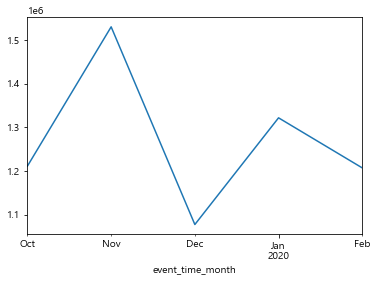

In [156]:
df[df['event_type'] == 'purchase'].groupby('event_time_month').sum()['price'].plot()

c:\users\user\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
c:\users\user\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


TypeError: __init__() got an unexpected keyword argument 'epoch'

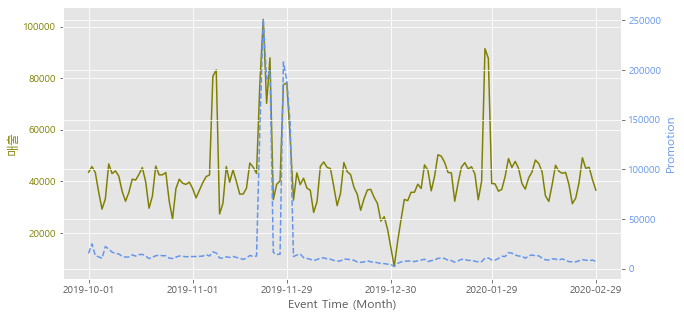

In [5]:
plt.style.use('ggplot')

fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()

ax1.plot(df[df['event_type'] == 'purchase'].groupby('event_time_day').sum()['price'], color='olive', label='Purchase Price')
ax1.set_ylabel('매출', color='olive')
ax1.tick_params(axis='y', labelcolor='olive')

ax2.plot(df.groupby('event_time_day').sum()['promotion'], ls='--', color='cornflowerblue')
ax2.set_ylabel('Promotion', color='cornflowerblue')
ax2.tick_params(axis='y', labelcolor='cornflowerblue')

ax1.set_xlabel('Event Time (Month)')

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y', epoch='2019-10-01'))

ax1.legend(loc='best')
ax2.legend(loc='best')

ax1.grid(False)
ax2.grid(False)

plt.show()

c:\users\user\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


<AxesSubplot:xlabel='event_time_day'>

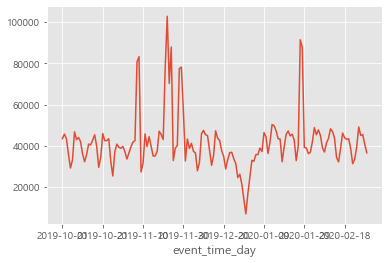

In [5]:
df[df['event_type'] == 'purchase'].groupby('event_time_day').sum()['price'].plot()

c:\users\user\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


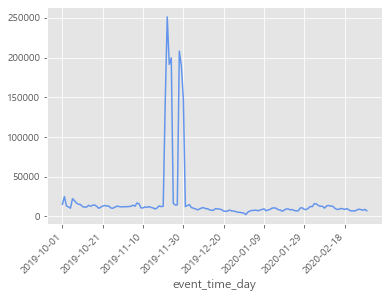

In [7]:
ax = df.groupby('event_time_day').sum()['promotion'].plot(color='cornflowerblue')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [262]:
df[df['promotion'] == 1].groupby('event_time_day').size()[df[df['promotion'] == 1].groupby('event_time_day').size()>40000]

event_time_day
2019-11-21    142542
2019-11-22    251151
2019-11-23    191271
2019-11-24    199547
2019-11-28    208117
2019-11-29    189841
2019-11-30    147056
Freq: D, dtype: int64

# RFM

In [34]:
#구매기준
purchase_count_df = df[df['event_type'] == 'purchase'].groupby(['user_id','event_time']).size().to_frame().reset_index().groupby('user_id').size().to_frame().rename(columns={0:'purchase_frequency'}).reset_index()
purchase_max_df = df[df['event_type'] == 'purchase'].groupby('user_id').max()[['event_time', 'price']].rename(columns={'price': 'max_price', 'event_time' : 'recency'}).reset_index()
purchase_count_items_df = df[df['event_type'] == 'purchase'].groupby('user_id').size().to_frame().rename(columns = {0:'purchase_items'}).reset_index()
purchase_sum_df = df[df['event_type'] == 'purchase'].groupby('user_id').sum()[['price', 'promotion', 'bfday']].rename(columns={'price':'total_price', 'promotion' : 'count_promotion', 'bfday' : 'count_bfday'}).reset_index()
purchase_mean_df = df[df['event_type'] == 'purchase'].groupby('user_id').mean()[['price', 'promotion', 'discount', 'bfday']].rename(columns={'price':'avg_price', 'promotion' :'ratio_promotion', 'discount':'avg_discount', 'bfday' : 'ratio_bfday'}).reset_index()

#장바구니기준
cart_count_df = df[df['event_type'] == 'cart'].groupby('user_id').size().to_frame().rename(columns={0:'cart_frequency'}).reset_index()

#방문 기준
visit_count_df = df.groupby(['user_id', 'user_session']).size().groupby('user_id').size().to_frame().rename(columns={0:'visit_frequency'}).reset_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_1600\2002668489.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  purchase_max_df = df[df['event_type'] == 'purchase'].groupby('user_id').max()[['event_time', 'price']].rename(columns={'price': 'max_price', 'event_time' : 'recency'}).reset_index()
c:\users\user\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


In [35]:
purchase_max_df['recency'] = pd.to_datetime(purchase_max_df['recency'])

In [36]:
user_df = purchase_max_df.copy()
user_df['recency'] = user_df['recency'].dt.to_period('D')
user_df['recency'] = (pd.to_datetime('2020-03-01') - user_df['recency'].dt.to_timestamp()).dt.days

c:\users\user\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [37]:
user_df = pd.merge(user_df, purchase_count_df, on='user_id', how='outer')

In [38]:
user_df = pd.merge(user_df, purchase_count_items_df, on='user_id', how='outer')

In [39]:
user_df = pd.merge(user_df, purchase_sum_df, on='user_id', how='outer')

In [40]:
user_df = pd.merge(user_df, purchase_mean_df, on='user_id', how='outer')

In [41]:
user_df = pd.merge(user_df, cart_count_df, on='user_id', how='outer')

In [42]:
user_df = pd.merge(user_df, visit_count_df, on='user_id', how='outer')

In [43]:
user_df['pur/cart'] = user_df['purchase_items']/ user_df['cart_frequency']

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.options.display.float_format = '{:.2f}'.format
plt.rc('font', family='Malgun Gothic')

user_df = pd.read_csv('user_df.csv', index_col=0)

In [5]:
user_df

,user_id,recency,max_price,purchase_frequency,purchase_items,total_price,count_promotion,count_bfday,avg_price,ratio_promotion,avg_discount,ratio_bfday,cart_frequency,visit_frequency,pur/cart,recency_grade,frequency_grade,monetary_grade,rfm_score,rfm_segment
0,9794320,97.00,5.24,1.00,4.00,12.68,0.00,0.00,3.17,0.00,0.00,0.00,56.00,19,0.07,3,3,3,3.00,3
1,10079204,116.00,13.56,1.00,2.00,25.81,1.00,0.00,12.90,0.50,15.00,0.00,2.00,1,1.00,3,3,2,2.50,3
2,10280338,11.00,18.10,5.00,86.00,177.83,7.00,6.00,2.07,0.08,0.58,0.07,212.00,12,0.41,1,1,1,1.00,1
3,12055855,72.00,5.48,1.00,4.00,16.54,0.00,0.00,4.13,0.00,0.00,0.00,10.00,1,0.40,2,3,3,2.80,3
4,12936739,44.00,26.97,1.00,2.00,29.89,0.00,0.00,14.95,0.00,0.00,0.00,5.00,1,0.40,2,3,2,2.30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110503,622065819,1.00,11.90,1.00,4.00,20.48,0.00,0.00,5.12,0.00,0.00,0.00,11.00,3,0.36,1,3,3,2.60,3
110504,622066161,1.00,6.95,1.00,4.00,12.95,0.00,0.00,3.24,0.00,0.00,0.00,10.00,1,0.40,1,3,3,2.60,3
110505,622067983,1.00,26.19,1.00,10.00,66.48,1.00,0.00,6.65,0.10,0.99,0.00,34.00,1,0.29,1,3,1,1.60,1
110506,622069477,1.00,0.95,1.00,1.00,0.95,0.00,0.00,0.95,0.00,0.00,0.00,46.00,1,0.02,1,3,3,2.60,3


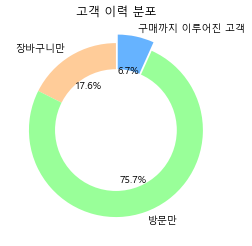

In [16]:
import matplotlib.pyplot as plt

# 데이터
labels = ['장바구니만', '방문만', '구매까지 이루어진 고객']
sizes = [287970, 1240017, 1638495 - (287970 + 1240017)]  # 나머지는 모두 있는 고객
colors = ['#ffcc99','#99ff99','#66b3ff']
explode = (0, 0, 0.1)  # 첫 번째와 두 번째 조각을 약간 떼어냄 (가운데 빈 도넛 모양)

# 파이차트 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, wedgeprops=dict(width=0.4))

# 도넛 차트의 중앙에 원을 그려서 구멍을 만듭니다.
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('고객 이력 분포')
plt.show()


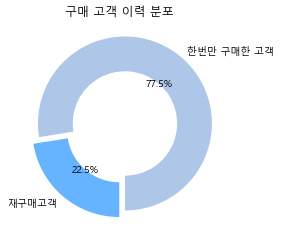

In [17]:
import matplotlib.pyplot as plt

# 데이터
labels = ['한번만 구매한 고객', '재구매고객']
sizes = [85664, 24844]  # 각 카테고리의 고객 수
colors = ['#aec7e8', '#66b3ff']
explode = (0.1, 0)  # 첫 번째 조각을 약간 떼어냄 (가운데 빈 도넛 모양)

# 파이차트 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=270, colors=colors, explode=explode, wedgeprops=dict(width=0.4))

# 도넛 차트의 중앙에 원을 그려서 구멍을 만듭니다.
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()

plt.title('구매 고객 이력 분포')
plt.show()


In [45]:
user_df.isna().sum()

user_id                     0
recency               1527987
max_price             1527987
purchase_frequency    1527987
purchase_items        1527987
total_price           1527987
count_promotion       1527987
count_bfday           1527987
avg_price             1527987
ratio_promotion       1527987
avg_discount          1527987
ratio_bfday           1527987
cart_frequency        1241003
visit_frequency             0
pur/cart              1528973
dtype: int64

In [142]:
user_df[['max_price', 'purchase_frequency', 'purchase_items', 'total_price', 'ratio_promotion', 'ratio_bfday', 'avg_price']]

,max_price,purchase_frequency,purchase_items,total_price,ratio_promotion,ratio_bfday,avg_price
0,5.24,1.00,4.00,12.68,0.00,0.00,3.17
1,13.56,1.00,2.00,25.81,0.50,0.00,12.90
2,18.10,5.00,86.00,177.83,0.08,0.07,2.07
3,5.48,1.00,4.00,16.54,0.00,0.00,4.13
4,26.97,1.00,2.00,29.89,0.00,0.00,14.95
...,...,...,...,...,...,...,...
110503,11.90,1.00,4.00,20.48,0.00,0.00,5.12
110504,6.95,1.00,4.00,12.95,0.00,0.00,3.24
110505,26.19,1.00,10.00,66.48,0.10,0.00,6.65
110506,0.95,1.00,1.00,0.95,0.00,0.00,0.95


In [20]:
# user_df['recency'].max()
# user_df['recency'] = user_df['recency'].fillna(152)

In [21]:
user_df = user_df.dropna()

In [53]:
num_grades = 3
grade_labels = list(range(1, num_grades + 1))
grade_labels

[1, 2, 3]

## recency

In [54]:
recency_grade = pd.qcut(x=user_df['recency'], q=num_grades, labels=grade_labels)

In [55]:
user_df['recency_grade'] = recency_grade

In [56]:
user_df

,user_id,recency,max_price,purchase_frequency,purchase_items,total_price,count_promotion,count_bfday,avg_price,ratio_promotion,avg_discount,ratio_bfday,cart_frequency,visit_frequency,pur/cart,recency_grade,frequency_grade,monetary_grade,rfm_score,rfm_segment
0,9794320,97.00,5.24,1.00,4.00,12.68,0.00,0.00,3.17,0.00,0.00,0.00,56.00,19,0.07,3,3,3,3.00,3
1,10079204,116.00,13.56,1.00,2.00,25.81,1.00,0.00,12.90,0.50,15.00,0.00,2.00,1,1.00,3,3,2,2.50,3
2,10280338,11.00,18.10,5.00,86.00,177.83,7.00,6.00,2.07,0.08,0.58,0.07,212.00,12,0.41,1,1,1,1.00,1
3,12055855,72.00,5.48,1.00,4.00,16.54,0.00,0.00,4.13,0.00,0.00,0.00,10.00,1,0.40,2,3,3,2.80,3
4,12936739,44.00,26.97,1.00,2.00,29.89,0.00,0.00,14.95,0.00,0.00,0.00,5.00,1,0.40,2,3,2,2.30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110503,622065819,1.00,11.90,1.00,4.00,20.48,0.00,0.00,5.12,0.00,0.00,0.00,11.00,3,0.36,1,3,3,2.60,3
110504,622066161,1.00,6.95,1.00,4.00,12.95,0.00,0.00,3.24,0.00,0.00,0.00,10.00,1,0.40,1,3,3,2.60,3
110505,622067983,1.00,26.19,1.00,10.00,66.48,1.00,0.00,6.65,0.10,0.99,0.00,34.00,1,0.29,1,3,1,1.60,1
110506,622069477,1.00,0.95,1.00,1.00,0.95,0.00,0.00,0.95,0.00,0.00,0.00,46.00,1,0.02,1,3,3,2.60,3


In [57]:
user_df.groupby('recency_grade').size()

recency_grade
1    37170
2    36037
3    36315
dtype: int64

In [58]:
user_df.groupby('recency_grade').max()['recency']

recency_grade
1    42.00
2    95.00
3   152.00
Name: recency, dtype: float64

In [59]:
user_df.groupby('recency_grade').mean()['recency']

recency_grade
1    21.27
2    70.06
3   121.75
Name: recency, dtype: float64

<AxesSubplot:title={'center':'Recency 등급별 매출 기여도'}>

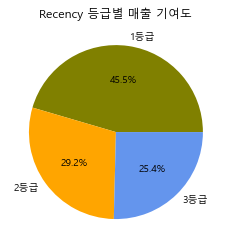

In [60]:
user_df.groupby('recency_grade').sum(numeric_only=True)['total_price'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title = 'Recency 등급별 매출 기여도',
    ylabel='',
    colors=['olive', 'orange', 'cornflowerblue']
)

## Frequency

In [61]:
user_df['purchase_frequency'].value_counts()

1.00      84738
2.00      14774
3.00       4941
4.00       2246
5.00       1132
6.00        645
7.00        342
8.00        233
9.00        159
10.00        78
11.00        60
12.00        40
13.00        30
14.00        24
15.00        15
16.00         8
17.00         7
18.00         5
25.00         4
20.00         4
19.00         4
21.00         3
26.00         3
22.00         2
23.00         2
33.00         2
35.00         2
24.00         2
79.00         2
29.00         2
34.00         2
121.00        1
50.00         1
108.00        1
41.00         1
37.00         1
156.00        1
67.00         1
40.00         1
27.00         1
71.00         1
76.00         1
Name: purchase_frequency, dtype: int64

In [62]:
# frequency_grade = pd.qcut(x=user_df['purchase_frequency'], q=num_grades, labels=grade_labels[::-1])
custom_bins = [0,1,2,user_df['purchase_frequency'].max()]
frequency_grade = pd.cut(x=user_df['purchase_frequency'], bins=custom_bins, labels=grade_labels[::-1][:len(custom_bins)-1], include_lowest=True)

In [63]:
user_df['frequency_grade'] = frequency_grade

In [64]:
user_df

,user_id,recency,max_price,purchase_frequency,purchase_items,total_price,count_promotion,count_bfday,avg_price,ratio_promotion,avg_discount,ratio_bfday,cart_frequency,visit_frequency,pur/cart,recency_grade,frequency_grade,monetary_grade,rfm_score,rfm_segment
0,9794320,97.00,5.24,1.00,4.00,12.68,0.00,0.00,3.17,0.00,0.00,0.00,56.00,19,0.07,3,3,3,3.00,3
1,10079204,116.00,13.56,1.00,2.00,25.81,1.00,0.00,12.90,0.50,15.00,0.00,2.00,1,1.00,3,3,2,2.50,3
2,10280338,11.00,18.10,5.00,86.00,177.83,7.00,6.00,2.07,0.08,0.58,0.07,212.00,12,0.41,1,1,1,1.00,1
3,12055855,72.00,5.48,1.00,4.00,16.54,0.00,0.00,4.13,0.00,0.00,0.00,10.00,1,0.40,2,3,3,2.80,3
4,12936739,44.00,26.97,1.00,2.00,29.89,0.00,0.00,14.95,0.00,0.00,0.00,5.00,1,0.40,2,3,2,2.30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110503,622065819,1.00,11.90,1.00,4.00,20.48,0.00,0.00,5.12,0.00,0.00,0.00,11.00,3,0.36,1,3,3,2.60,3
110504,622066161,1.00,6.95,1.00,4.00,12.95,0.00,0.00,3.24,0.00,0.00,0.00,10.00,1,0.40,1,3,3,2.60,3
110505,622067983,1.00,26.19,1.00,10.00,66.48,1.00,0.00,6.65,0.10,0.99,0.00,34.00,1,0.29,1,3,1,1.60,1
110506,622069477,1.00,0.95,1.00,1.00,0.95,0.00,0.00,0.95,0.00,0.00,0.00,46.00,1,0.02,1,3,3,2.60,3


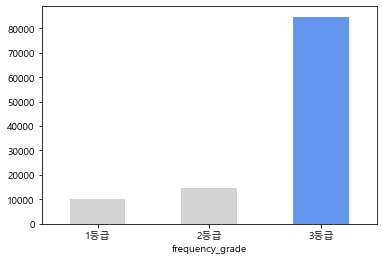

In [101]:
frequency_counts = user_df.groupby('frequency_grade').size()

# 막대 그래프 그리기
ax = frequency_counts.plot(kind='bar', rot=0, color=['lightgrey', 'lightgrey', 'cornflowerblue'])

# x축 라벨 수정
labels = [f'{grade}등급' for grade in frequency_counts.index]
ax.set_xticklabels(labels)

# 그래프 표시
plt.show()

In [66]:
user_df.groupby('frequency_grade').min()['purchase_frequency']

frequency_grade
3   1.00
2   2.00
1   3.00
Name: purchase_frequency, dtype: float64

In [67]:
user_df.groupby('frequency_grade').mean()['purchase_frequency']

frequency_grade
3   1.00
2   2.00
1   4.39
Name: purchase_frequency, dtype: float64

<AxesSubplot:title={'center':'Frequency 등급별 매출 기여도'}>

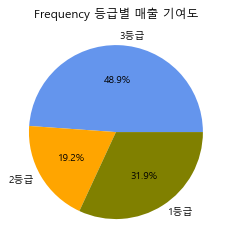

In [68]:
user_df.groupby('frequency_grade').sum(numeric_only=True)['total_price'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels[::-1]],
    title = 'Frequency 등급별 매출 기여도',
    ylabel='',
    colors=['cornflowerblue', 'orange', 'olive']
)

<AxesSubplot:title={'center':'Frequency 등급별 평균 매출 기여도'}>

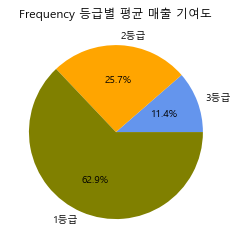

In [154]:
user_df.groupby('frequency_grade').mean(numeric_only=True)['total_price'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels[::-1]],
    title = 'Frequency 등급별 평균 매출 기여도',
    ylabel='',
    colors=['cornflowerblue', 'orange', 'olive']
)

## Monetary

In [69]:
monetary_grade = pd.qcut(x=user_df['total_price'], q=num_grades, labels=grade_labels[::-1])

In [70]:
user_df['monetary_grade'] = monetary_grade

In [71]:
user_df

,user_id,recency,max_price,purchase_frequency,purchase_items,total_price,count_promotion,count_bfday,avg_price,ratio_promotion,avg_discount,ratio_bfday,cart_frequency,visit_frequency,pur/cart,recency_grade,frequency_grade,monetary_grade,rfm_score,rfm_segment
0,9794320,97.00,5.24,1.00,4.00,12.68,0.00,0.00,3.17,0.00,0.00,0.00,56.00,19,0.07,3,3,3,3.00,3
1,10079204,116.00,13.56,1.00,2.00,25.81,1.00,0.00,12.90,0.50,15.00,0.00,2.00,1,1.00,3,3,2,2.50,3
2,10280338,11.00,18.10,5.00,86.00,177.83,7.00,6.00,2.07,0.08,0.58,0.07,212.00,12,0.41,1,1,1,1.00,1
3,12055855,72.00,5.48,1.00,4.00,16.54,0.00,0.00,4.13,0.00,0.00,0.00,10.00,1,0.40,2,3,3,2.80,3
4,12936739,44.00,26.97,1.00,2.00,29.89,0.00,0.00,14.95,0.00,0.00,0.00,5.00,1,0.40,2,3,2,2.30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110503,622065819,1.00,11.90,1.00,4.00,20.48,0.00,0.00,5.12,0.00,0.00,0.00,11.00,3,0.36,1,3,3,2.60,3
110504,622066161,1.00,6.95,1.00,4.00,12.95,0.00,0.00,3.24,0.00,0.00,0.00,10.00,1,0.40,1,3,3,2.60,3
110505,622067983,1.00,26.19,1.00,10.00,66.48,1.00,0.00,6.65,0.10,0.99,0.00,34.00,1,0.29,1,3,1,1.60,1
110506,622069477,1.00,0.95,1.00,1.00,0.95,0.00,0.00,0.95,0.00,0.00,0.00,46.00,1,0.02,1,3,3,2.60,3


In [72]:
user_df.groupby('monetary_grade').size()

monetary_grade
3    36509
2    36510
1    36503
dtype: int64

In [73]:
user_df.groupby('monetary_grade').min()['total_price']

monetary_grade
3    0.13
2   20.69
1   48.37
Name: total_price, dtype: float64

In [74]:
user_df.groupby('monetary_grade').mean()['total_price']

monetary_grade
3    12.88
2    33.56
1   126.13
Name: total_price, dtype: float64

<AxesSubplot:title={'center':'Monetary 등급별 매출 기여도'}>

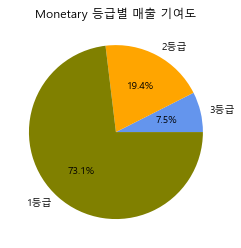

In [152]:
user_df.groupby('monetary_grade').sum(numeric_only=True)['total_price'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels[::-1]],
    title = 'Monetary 등급별 매출 기여도',
    ylabel='',
    colors=['cornflowerblue', 'orange', 'olive']
)

## Topvalue

In [51]:
topvalue_grade = pd.qcut(x=user_df['max_price'], q=num_grades, labels=grade_labels[::-1])

In [52]:
user_df['topvalue_grade'] = topvalue_grade

In [53]:
user_df

,user_id,recency,max_price,frequency,total_price,cart_frequency,visit_frequency,recency_grade,frequency_grade,monetary_grade,topvalue_grade
0,9794320,97.00,5.24,4.00,12.68,56.00,19,4,4,5,5
1,10079204,116.00,13.56,2.00,25.81,2.00,1,5,5,3,2
2,10280338,11.00,18.10,86.00,177.83,212.00,12,1,1,1,2
3,12055855,72.00,5.48,4.00,16.54,10.00,1,3,4,4,5
4,12936739,44.00,26.97,2.00,29.89,5.00,1,2,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...
110503,622065819,1.00,11.90,4.00,20.48,11.00,3,1,4,4,3
110504,622066161,1.00,6.95,4.00,12.95,10.00,1,1,4,5,4
110505,622067983,1.00,26.19,10.00,66.48,34.00,1,1,2,2,1
110506,622069477,1.00,0.95,1.00,0.95,46.00,1,1,5,5,5


In [54]:
user_df['topvalue_grade'].value_counts()

5    23569
3    22087
2    21993
1    21587
4    20286
Name: topvalue_grade, dtype: int64

In [55]:
user_df.groupby('topvalue_grade').median()['max_price']

topvalue_grade
5    4.44
4    6.81
3   10.32
2   15.71
1   31.24
Name: max_price, dtype: float64

<AxesSubplot:title={'center':'topvalue 등급별 매출 기여도'}>

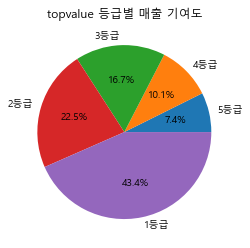

In [56]:
user_df.groupby('topvalue_grade').sum(numeric_only=True)['total_price'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels[::-1]],
    title = 'topvalue 등급별 매출 기여도',
    ylabel=''
)

## cart_frequency

In [57]:
cart_frequency_grade = pd.qcut(x=user_df['cart_frequency'], q=num_grades, labels=grade_labels[::-1])

In [58]:
user_df['cart_frequency_grade'] = cart_frequency_grade

In [59]:
user_df

,user_id,recency,max_price,frequency,total_price,cart_frequency,visit_frequency,recency_grade,frequency_grade,monetary_grade,topvalue_grade,cart_frequency_grade
0,9794320,97.00,5.24,4.00,12.68,56.00,19,4,4,5,5,1
1,10079204,116.00,13.56,2.00,25.81,2.00,1,5,5,3,2,5
2,10280338,11.00,18.10,86.00,177.83,212.00,12,1,1,1,2,1
3,12055855,72.00,5.48,4.00,16.54,10.00,1,3,4,4,5,3
4,12936739,44.00,26.97,2.00,29.89,5.00,1,2,5,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
110503,622065819,1.00,11.90,4.00,20.48,11.00,3,1,4,4,3,3
110504,622066161,1.00,6.95,4.00,12.95,10.00,1,1,4,5,4,3
110505,622067983,1.00,26.19,10.00,66.48,34.00,1,1,2,2,1,2
110506,622069477,1.00,0.95,1.00,0.95,46.00,1,1,5,5,5,1


In [60]:
user_df['cart_frequency_grade'].value_counts()

5    23275
4    21773
3    21663
1    21601
2    21210
Name: cart_frequency_grade, dtype: int64

In [61]:
user_df.groupby('cart_frequency_grade').mean()['cart_frequency']

cart_frequency_grade
5     2.58
4     6.81
3    13.47
2    27.49
1   108.32
Name: cart_frequency, dtype: float64

<AxesSubplot:title={'center':'cart_frequency 등급별 매출 기여도'}>

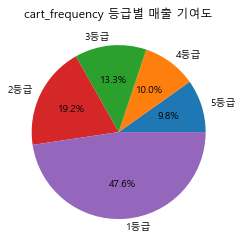

In [62]:
user_df.groupby('cart_frequency_grade').sum(numeric_only=True)['total_price'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels[::-1]],
    title = 'cart_frequency 등급별 매출 기여도',
    ylabel=''
)

## visit_frequency

In [63]:
user_df.sort_values('visit_frequency', ascending=False).head(10)

,user_id,recency,max_price,frequency,total_price,cart_frequency,visit_frequency,recency_grade,frequency_grade,monetary_grade,topvalue_grade,cart_frequency_grade
52331,557616099,83.00,19.89,9.00,67.20,217.00,8544,3,2,2,1,1
52866,557956487,6.00,27.49,38.00,262.11,298.00,5672,1,1,1,1,1
48542,553753653,52.00,6.51,10.00,33.07,65.00,3337,3,2,3,4,1
28851,500927959,25.00,9.92,32.00,81.20,66.00,3017,1,1,1,3,1
795,223293700,5.00,42.86,150.00,848.12,203.00,3006,1,1,1,1,1
75740,577763915,33.00,4.44,29.00,42.15,241.00,2401,2,1,2,5,1
91002,597135174,5.00,8.25,120.00,314.60,527.00,2224,1,1,1,4,1
13805,428133223,3.00,13.49,155.00,489.88,252.00,1872,1,1,1,2,1
24354,479928991,4.00,71.43,122.00,764.74,729.00,1803,1,1,1,1,1
16404,443045778,17.00,207.94,111.00,1107.49,755.00,1678,1,1,1,1,1


In [64]:
visit_frequency_grade = pd.qcut(x=user_df['visit_frequency'], q=num_grades+1, labels=grade_labels[::-1], duplicates='drop')

In [65]:
user_df['visit_frequency_grade'] = visit_frequency_grade

In [66]:
user_df

,user_id,recency,max_price,frequency,total_price,cart_frequency,visit_frequency,recency_grade,frequency_grade,monetary_grade,topvalue_grade,cart_frequency_grade,visit_frequency_grade
0,9794320,97.00,5.24,4.00,12.68,56.00,19,4,4,5,5,1,1
1,10079204,116.00,13.56,2.00,25.81,2.00,1,5,5,3,2,5,5
2,10280338,11.00,18.10,86.00,177.83,212.00,12,1,1,1,2,1,2
3,12055855,72.00,5.48,4.00,16.54,10.00,1,3,4,4,5,3,5
4,12936739,44.00,26.97,2.00,29.89,5.00,1,2,5,3,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110503,622065819,1.00,11.90,4.00,20.48,11.00,3,1,4,4,3,3,4
110504,622066161,1.00,6.95,4.00,12.95,10.00,1,1,4,5,4,3,5
110505,622067983,1.00,26.19,10.00,66.48,34.00,1,1,2,2,1,2,5
110506,622069477,1.00,0.95,1.00,0.95,46.00,1,1,5,5,5,1,5


In [67]:
user_df['visit_frequency_grade'].value_counts()

5    36692
3    19239
4    18596
1    17954
2    17041
Name: visit_frequency_grade, dtype: int64

In [68]:
user_df.groupby('visit_frequency_grade').median()['visit_frequency']

visit_frequency_grade
5    1.00
4    3.00
3    6.00
2   12.00
1   32.00
Name: visit_frequency, dtype: float64

<AxesSubplot:title={'center':'visit_frequeny 등급별 매출 기여도'}>

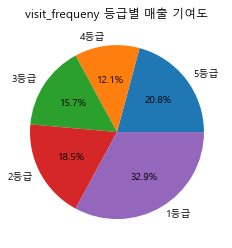

In [69]:
user_df.groupby('visit_frequency_grade').sum(numeric_only=True)['total_price'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels[::-1]],
    title = 'visit_frequeny 등급별 매출 기여도',
    ylabel=''
)

## 가중합

In [76]:
weight = {}
weight['recency'] = 0.2
weight['frequency'] = 0.3
weight['monetary'] = 0.5
# weight['topvalue'] = 1/6
# weight['cart_frequency'] = 1/6
# weight['visit_frequency'] = 1/6

In [77]:
weight

{'recency': 0.2, 'frequency': 0.3, 'monetary': 0.5}

In [78]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109522 entries, 0 to 110507
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   user_id             109522 non-null  int64   
 1   recency             109522 non-null  float64 
 2   max_price           109522 non-null  float64 
 3   purchase_frequency  109522 non-null  float64 
 4   purchase_items      109522 non-null  float64 
 5   total_price         109522 non-null  float64 
 6   count_promotion     109522 non-null  float64 
 7   count_bfday         109522 non-null  float64 
 8   avg_price           109522 non-null  float64 
 9   ratio_promotion     109522 non-null  float64 
 10  avg_discount        109522 non-null  float64 
 11  ratio_bfday         109522 non-null  float64 
 12  cart_frequency      109522 non-null  float64 
 13  visit_frequency     109522 non-null  int64   
 14  pur/cart            109522 non-null  float64 
 15  recency_grade    

In [79]:
user_df

,user_id,recency,max_price,purchase_frequency,purchase_items,total_price,count_promotion,count_bfday,avg_price,ratio_promotion,avg_discount,ratio_bfday,cart_frequency,visit_frequency,pur/cart,recency_grade,frequency_grade,monetary_grade,rfm_score,rfm_segment
0,9794320,97.00,5.24,1.00,4.00,12.68,0.00,0.00,3.17,0.00,0.00,0.00,56.00,19,0.07,3,3,3,3.00,3
1,10079204,116.00,13.56,1.00,2.00,25.81,1.00,0.00,12.90,0.50,15.00,0.00,2.00,1,1.00,3,3,2,2.50,3
2,10280338,11.00,18.10,5.00,86.00,177.83,7.00,6.00,2.07,0.08,0.58,0.07,212.00,12,0.41,1,1,1,1.00,1
3,12055855,72.00,5.48,1.00,4.00,16.54,0.00,0.00,4.13,0.00,0.00,0.00,10.00,1,0.40,2,3,3,2.80,3
4,12936739,44.00,26.97,1.00,2.00,29.89,0.00,0.00,14.95,0.00,0.00,0.00,5.00,1,0.40,2,3,2,2.30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110503,622065819,1.00,11.90,1.00,4.00,20.48,0.00,0.00,5.12,0.00,0.00,0.00,11.00,3,0.36,1,3,3,2.60,3
110504,622066161,1.00,6.95,1.00,4.00,12.95,0.00,0.00,3.24,0.00,0.00,0.00,10.00,1,0.40,1,3,3,2.60,3
110505,622067983,1.00,26.19,1.00,10.00,66.48,1.00,0.00,6.65,0.10,0.99,0.00,34.00,1,0.29,1,3,1,1.60,1
110506,622069477,1.00,0.95,1.00,1.00,0.95,0.00,0.00,0.95,0.00,0.00,0.00,46.00,1,0.02,1,3,3,2.60,3


In [80]:
user_df['rfm_score'] = 0
for key, value in weight.items():
    user_df['rfm_score'] += value * user_df[key + '_grade'].astype('int')

In [81]:
user_df

,user_id,recency,max_price,purchase_frequency,purchase_items,total_price,count_promotion,count_bfday,avg_price,ratio_promotion,avg_discount,ratio_bfday,cart_frequency,visit_frequency,pur/cart,recency_grade,frequency_grade,monetary_grade,rfm_score,rfm_segment
0,9794320,97.00,5.24,1.00,4.00,12.68,0.00,0.00,3.17,0.00,0.00,0.00,56.00,19,0.07,3,3,3,3.00,3
1,10079204,116.00,13.56,1.00,2.00,25.81,1.00,0.00,12.90,0.50,15.00,0.00,2.00,1,1.00,3,3,2,2.50,3
2,10280338,11.00,18.10,5.00,86.00,177.83,7.00,6.00,2.07,0.08,0.58,0.07,212.00,12,0.41,1,1,1,1.00,1
3,12055855,72.00,5.48,1.00,4.00,16.54,0.00,0.00,4.13,0.00,0.00,0.00,10.00,1,0.40,2,3,3,2.80,3
4,12936739,44.00,26.97,1.00,2.00,29.89,0.00,0.00,14.95,0.00,0.00,0.00,5.00,1,0.40,2,3,2,2.30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110503,622065819,1.00,11.90,1.00,4.00,20.48,0.00,0.00,5.12,0.00,0.00,0.00,11.00,3,0.36,1,3,3,2.60,3
110504,622066161,1.00,6.95,1.00,4.00,12.95,0.00,0.00,3.24,0.00,0.00,0.00,10.00,1,0.40,1,3,3,2.60,3
110505,622067983,1.00,26.19,1.00,10.00,66.48,1.00,0.00,6.65,0.10,0.99,0.00,34.00,1,0.29,1,3,1,1.60,1
110506,622069477,1.00,0.95,1.00,1.00,0.95,0.00,0.00,0.95,0.00,0.00,0.00,46.00,1,0.02,1,3,3,2.60,3


In [82]:
user_df['rfm_score']

0        3.00
1        2.50
2        1.00
3        2.80
4        2.30
         ... 
110503   2.60
110504   2.60
110505   1.60
110506   2.60
110507   2.60
Name: rfm_score, Length: 109522, dtype: float64

In [83]:
# def rfm_segment_bins(x):
#     if x <= 9/5:
#         return 1
#     elif x <= 13/5:
#         return 2
#     elif x <= 17/5:
#         return 3
#     elif x <= 21/5:
#         return 4
#     else :
#         return 5

def rfm_segment_bins(x):
    if x <= 5/3:
        return 1
    elif x<= 7/3:
        return 2
    else:
        return 3

In [84]:
user_df['rfm_segment'] = user_df['rfm_score'].apply(rfm_segment_bins)

In [85]:
user_df['rfm_segment'].value_counts()

3    48033
2    39553
1    21936
Name: rfm_segment, dtype: int64

<AxesSubplot:title={'center':'RFM 고객 세그먼트별 매출 기여도'}>

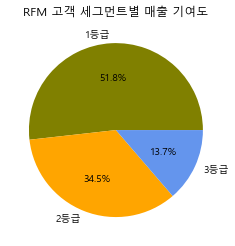

In [86]:
user_df.groupby('rfm_segment').sum(numeric_only=True)['total_price'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='RFM 고객 세그먼트별 매출 기여도',
    ylabel='',
    colors=['olive', 'orange', 'cornflowerblue']
)

In [87]:
user_df

,user_id,recency,max_price,purchase_frequency,purchase_items,total_price,count_promotion,count_bfday,avg_price,ratio_promotion,avg_discount,ratio_bfday,cart_frequency,visit_frequency,pur/cart,recency_grade,frequency_grade,monetary_grade,rfm_score,rfm_segment
0,9794320,97.00,5.24,1.00,4.00,12.68,0.00,0.00,3.17,0.00,0.00,0.00,56.00,19,0.07,3,3,3,3.00,3
1,10079204,116.00,13.56,1.00,2.00,25.81,1.00,0.00,12.90,0.50,15.00,0.00,2.00,1,1.00,3,3,2,2.50,3
2,10280338,11.00,18.10,5.00,86.00,177.83,7.00,6.00,2.07,0.08,0.58,0.07,212.00,12,0.41,1,1,1,1.00,1
3,12055855,72.00,5.48,1.00,4.00,16.54,0.00,0.00,4.13,0.00,0.00,0.00,10.00,1,0.40,2,3,3,2.80,3
4,12936739,44.00,26.97,1.00,2.00,29.89,0.00,0.00,14.95,0.00,0.00,0.00,5.00,1,0.40,2,3,2,2.30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110503,622065819,1.00,11.90,1.00,4.00,20.48,0.00,0.00,5.12,0.00,0.00,0.00,11.00,3,0.36,1,3,3,2.60,3
110504,622066161,1.00,6.95,1.00,4.00,12.95,0.00,0.00,3.24,0.00,0.00,0.00,10.00,1,0.40,1,3,3,2.60,3
110505,622067983,1.00,26.19,1.00,10.00,66.48,1.00,0.00,6.65,0.10,0.99,0.00,34.00,1,0.29,1,3,1,1.60,1
110506,622069477,1.00,0.95,1.00,1.00,0.95,0.00,0.00,0.95,0.00,0.00,0.00,46.00,1,0.02,1,3,3,2.60,3


In [225]:
# user_df.to_csv('user_df.csv')

# Cohort

In [6]:
purchase_df = df[(df['event_type'] == 'purchase')]

In [7]:
oct_purchase_df = purchase_df[(purchase_df['event_time'] < '2019-11-01')]

In [8]:
nov_purchase_df = purchase_df[(purchase_df['event_time'] >= '2019-11-01')&(purchase_df['event_time'] < '2019-12-01')]
dec_purchase_df = purchase_df[(purchase_df['event_time'] >= '2019-12-01')&(purchase_df['event_time'] < '2020-01-01')]
jan_purchase_df = purchase_df[(purchase_df['event_time'] >= '2020-01-01')&(purchase_df['event_time'] < '2020-02-01')]
feb_purchase_df = purchase_df[(purchase_df['event_time'] >= '2020-02-01')&(purchase_df['event_time'] < '2020-03-01')]

In [9]:
bfday_user = purchase_df[purchase_df['bfday'] == 1].groupby(['user_id', 'user_session']).size().groupby('user_id').size().reset_index().rename(columns={0:'bfday_purchase'})
before_bfday_user = purchase_df[(purchase_df['event_time'] < '2019-11-21')].groupby(['user_id', 'user_session']).size().groupby('user_id').size().reset_index().rename(columns={0:'before_bfday_purchase'})
after_bfday_user = purchase_df[(purchase_df['event_time'] > '2019-11-30')].groupby(['user_id', 'user_session']).size().groupby('user_id').size().reset_index().rename(columns={0:'after_bfday_purchase'})

In [10]:
oct_user = oct_purchase_df.groupby(['user_id', 'user_session']).size().groupby('user_id').size().reset_index().rename(columns={0:'oct_purchase'})
nov_user = nov_purchase_df.groupby(['user_id', 'user_session']).size().groupby('user_id').size().reset_index().rename(columns={0:'nov_purchase'})
dec_user = dec_purchase_df.groupby(['user_id', 'user_session']).size().groupby('user_id').size().reset_index().rename(columns={0:'dec_purchase'})
jan_user = jan_purchase_df.groupby(['user_id', 'user_session']).size().groupby('user_id').size().reset_index().rename(columns={0:'jan_purchase'})
feb_user = feb_purchase_df.groupby(['user_id', 'user_session']).size().groupby('user_id').size().reset_index().rename(columns={0:'feb_purchase'})

In [11]:
from functools import reduce
merge_df = reduce(lambda left, right: pd.merge(left, right, on='user_id', how='outer'), [oct_user, nov_user, dec_user, jan_user, feb_user, bfday_user, before_bfday_user, after_bfday_user])

In [12]:
merge_df = merge_df.fillna(0)

In [13]:
# merge_df.to_csv('user_month_df.csv')

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.options.display.float_format = '{:.2f}'.format
plt.rc('font', family='Malgun Gothic')

user_month_df = pd.read_csv('user_month_df.csv', index_col=0)

In [15]:
user_month_df

,user_id,oct_purchase,nov_purchase,dec_purchase,jan_purchase,feb_purchase,bfday_purchase,before_bfday_purchase,after_bfday_purchase
0,29025780,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,31229488,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,33535391,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,33609704,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,34080306,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...
110503,622065819,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
110504,622066161,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
110505,622067983,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
110506,622069477,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00


In [16]:
user_month_df.loc[(user_month_df['oct_purchase']>0),'oct_first'] = 1
user_month_df.loc[(user_month_df['oct_purchase'] == 0) & (user_month_df['nov_purchase'] > 0), 'nov_first'] = 1
user_month_df.loc[(user_month_df['oct_purchase'] == 0) & (user_month_df['nov_purchase'] == 0) & (user_month_df['dec_purchase'] > 0), 'dec_first'] = 1
user_month_df.loc[(user_month_df['oct_purchase'] == 0) & (user_month_df['nov_purchase'] == 0) & (user_month_df['dec_purchase'] == 0) &(user_month_df['jan_purchase'] > 0), 'jan_first'] = 1
user_month_df.loc[(user_month_df['oct_purchase'] == 0) & (user_month_df['nov_purchase'] == 0) & (user_month_df['dec_purchase'] == 0) & (user_month_df['jan_purchase'] == 0) &(user_month_df['feb_purchase'] > 0), 'feb_first'] = 1
user_month_df.loc[(user_month_df['before_bfday_purchase'] == 0) & (user_month_df['bfday_purchase'] > 0), 'bfday_first'] = 1
user_month_df.loc[(user_month_df['bfday_purchase'] > 0 ) & (user_month_df['after_bfday_purchase'] == 0) & (user_month_df['before_bfday_purchase'] == 0), 'only_bfday'] = 1

In [17]:
user_month_df = user_month_df.fillna(0)
user_month_df.loc[user_month_df['oct_purchase'] > 0, 'oct_t/f'] = 1
user_month_df.loc[user_month_df['nov_purchase'] > 0, 'nov_t/f'] = 1
user_month_df.loc[user_month_df['dec_purchase'] > 0, 'dec_t/f'] = 1
user_month_df.loc[user_month_df['jan_purchase'] > 0, 'jan_t/f'] = 1
user_month_df.loc[user_month_df['feb_purchase'] > 0, 'feb_t/f'] = 1
user_month_df = user_month_df.fillna(0)

In [18]:
user_month_df[['oct_first', 'nov_first', 'dec_first', 'jan_first', 'feb_first']].mean()

oct_first   0.23
nov_first   0.24
dec_first   0.18
jan_first   0.18
feb_first   0.16
dtype: float64

In [19]:
user_month_df

,user_id,oct_purchase,nov_purchase,dec_purchase,jan_purchase,feb_purchase,bfday_purchase,before_bfday_purchase,after_bfday_purchase,oct_first,...,dec_first,jan_first,feb_first,bfday_first,only_bfday,oct_t/f,nov_t/f,dec_t/f,jan_t/f,feb_t/f
0,29025780,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,31229488,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
2,33535391,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
3,33609704,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
4,34080306,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110503,622065819,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
110504,622066161,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
110505,622067983,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
110506,622069477,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [20]:
user_month_df.sum()

user_id                 58415092927598.00
oct_purchase                     29325.00
nov_purchase                     36566.00
dec_purchase                     28887.00
jan_purchase                     32380.00
feb_purchase                     29398.00
bfday_purchase                   13232.00
before_bfday_purchase            49755.00
after_bfday_purchase             91746.00
oct_first                        25762.00
nov_first                        26759.00
dec_first                        19698.00
jan_first                        20424.00
feb_first                        17865.00
bfday_first                       9410.00
only_bfday                        6735.00
oct_t/f                          25762.00
nov_t/f                          31522.00
dec_t/f                          25607.00
jan_t/f                          28216.00
feb_t/f                          25756.00
dtype: float64

In [21]:
user_month_df = pd.merge(user_month_df, user_df[['user_id', 'recency_grade', 'frequency_grade', 'monetary_grade', 'rfm_segment']], on='user_id', how='outer')

In [22]:
user_month_df

,user_id,oct_purchase,nov_purchase,dec_purchase,jan_purchase,feb_purchase,bfday_purchase,before_bfday_purchase,after_bfday_purchase,oct_first,...,only_bfday,oct_t/f,nov_t/f,dec_t/f,jan_t/f,feb_t/f,recency_grade,frequency_grade,monetary_grade,rfm_segment
0,29025780,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,3.00,2.00,2.00,2.00
1,31229488,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,3.00,3.00,3.00,3.00
2,33535391,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,3.00,3.00,1.00,2.00
3,33609704,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,3.00,3.00,2.00,3.00
4,34080306,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,...,0.00,1.00,0.00,1.00,0.00,0.00,2.00,2.00,2.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110503,622065819,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,1.00,3.00,3.00,3.00
110504,622066161,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,1.00,3.00,3.00,3.00
110505,622067983,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,1.00,3.00,1.00,1.00
110506,622069477,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,1.00,3.00,3.00,3.00


In [23]:
print(f'한번 구매한 사람 대상 총 매출 : {user_df[user_df["frequency_grade"] == 3].sum()["total_price"]}')
print(f'한번이상 구매한 사람 대상 총 매출 : {user_df[~(user_df["frequency_grade"] == 3)].sum()["total_price"]}')
print(f'한번 구매한 사람의 total_price 중앙값 : {user_df[user_df["frequency_grade"] == 3].median()["total_price"]}')
print(f'한번이상 구매한 사람의 total_price 중앙값 : {user_df[~(user_df["frequency_grade"] == 3)].median()["total_price"]}')

한번 구매한 사람 대상 총 매출 : 3079143.8800000004
한번이상 구매한 사람 대상 총 매출 : 3220245.4699999997
한번 구매한 사람의 total_price 중앙값 : 25.08
한번이상 구매한 사람의 total_price 중앙값 : 86.815


In [24]:
user_month_df.mean()[['oct_first', 'nov_first', 'dec_first', 'jan_first', 'feb_first', 'bfday_first', 'only_bfday', 'oct_t/f', 'nov_t/f', 'dec_t/f', 'jan_t/f', 'feb_t/f']].to_frame()

,0
oct_first,0.23
nov_first,0.24
dec_first,0.18
jan_first,0.18
feb_first,0.16
bfday_first,0.09
only_bfday,0.06
oct_t/f,0.23
nov_t/f,0.29
dec_t/f,0.23


In [25]:
user_df[user_df['frequency_grade'] == 3].mean()

user_id              536101215.52
recency                     76.43
max_price                   14.78
purchase_frequency           1.00
purchase_items               7.09
total_price                 36.34
count_promotion              1.09
count_bfday                  0.68
avg_price                    8.64
ratio_promotion              0.16
avg_discount                 2.45
ratio_bfday                  0.08
cart_frequency              18.52
visit_frequency              8.25
pur/cart                     0.65
recency_grade                2.09
frequency_grade              3.00
monetary_grade               2.21
rfm_score                    2.42
rfm_segment                  2.50
dtype: float64

In [26]:
segment_1 = user_month_df[user_month_df['rfm_segment'] == 1].mean()[['oct_first', 'nov_first', 'dec_first', 'jan_first', 'feb_first', 'bfday_first', 'only_bfday', 'oct_t/f', 'nov_t/f', 'dec_t/f', 'jan_t/f', 'feb_t/f']].to_frame().rename(columns={0:'1등급'}).T

In [27]:
segment_2 = user_month_df[user_month_df['rfm_segment'] == 2].mean()[['oct_first', 'nov_first', 'dec_first', 'jan_first', 'feb_first', 'bfday_first', 'only_bfday', 'oct_t/f', 'nov_t/f', 'dec_t/f', 'jan_t/f', 'feb_t/f']].to_frame().rename(columns={0:'2등급'}).T

In [28]:
segment_3 = user_month_df[user_month_df['rfm_segment'] == 3].mean()[['oct_first', 'nov_first', 'dec_first', 'jan_first', 'feb_first', 'bfday_first', 'only_bfday', 'oct_t/f', 'nov_t/f', 'dec_t/f', 'jan_t/f', 'feb_t/f']].to_frame().rename(columns={0:'3등급'}).T

In [29]:
pd.concat([segment_1, segment_2, segment_3])

,oct_first,nov_first,dec_first,jan_first,feb_first,bfday_first,only_bfday,oct_t/f,nov_t/f,dec_t/f,jan_t/f,feb_t/f
1등급,0.28,0.22,0.11,0.19,0.20,0.07,0.01,0.28,0.38,0.35,0.50,0.51
2등급,0.17,0.20,0.25,0.23,0.16,0.09,0.06,0.17,0.23,0.27,0.25,0.19
3등급,0.27,0.29,0.15,0.15,0.14,0.09,0.08,0.27,0.29,0.15,0.15,0.14


In [30]:
pd.concat([segment_1, segment_2, segment_3])[['bfday_first', 'only_bfday']]

,bfday_first,only_bfday
1등급,0.07,0.01
2등급,0.09,0.06
3등급,0.09,0.08


In [31]:
user_month_df[user_month_df['oct_purchase'] > 0].mean()

user_id                 497568433.26
oct_purchase                    1.14
nov_purchase                    0.26
dec_purchase                    0.17
jan_purchase                    0.18
feb_purchase                    0.14
bfday_purchase                  0.09
before_bfday_purchase           1.29
after_bfday_purchase            0.49
oct_first                       1.00
nov_first                       0.00
dec_first                       0.00
jan_first                       0.00
feb_first                       0.00
bfday_first                     0.00
only_bfday                      0.00
oct_t/f                         1.00
nov_t/f                         0.18
dec_t/f                         0.13
jan_t/f                         0.13
feb_t/f                         0.10
recency_grade                   2.60
frequency_grade                 2.44
monetary_grade                  1.84
rfm_segment                     2.26
dtype: float64

In [32]:
user_month_df[user_month_df['nov_first'] == 1].mean()

user_id                 512347548.51
oct_purchase                    0.00
nov_purchase                    1.11
dec_purchase                    0.12
jan_purchase                    0.13
feb_purchase                    0.10
bfday_purchase                  0.41
before_bfday_purchase           0.62
after_bfday_purchase            0.38
oct_first                       0.00
nov_first                       1.00
dec_first                       0.00
jan_first                       0.00
feb_first                       0.00
bfday_first                     0.35
only_bfday                      0.25
oct_t/f                         0.00
nov_t/f                         1.00
dec_t/f                         0.10
jan_t/f                         0.10
feb_t/f                         0.08
recency_grade                   2.53
frequency_grade                 2.63
monetary_grade                  1.94
rfm_segment                     2.35
dtype: float64

In [33]:
user_month_df[user_month_df['dec_first'] == 1].mean()

user_id                 534154601.96
oct_purchase                    0.00
nov_purchase                    0.00
dec_purchase                    1.08
jan_purchase                    0.11
feb_purchase                    0.08
bfday_purchase                  0.00
before_bfday_purchase           0.00
after_bfday_purchase            1.26
oct_first                       0.00
nov_first                       0.00
dec_first                       1.00
jan_first                       0.00
feb_first                       0.00
bfday_first                     0.00
only_bfday                      0.00
oct_t/f                         0.00
nov_t/f                         0.00
dec_t/f                         1.00
jan_t/f                         0.09
feb_t/f                         0.06
recency_grade                   1.90
frequency_grade                 2.76
monetary_grade                  2.09
rfm_segment                     2.24
dtype: float64

In [34]:
user_month_df[user_month_df['jan_first'] == 1].mean()

user_id                 550443397.62
oct_purchase                    0.00
nov_purchase                    0.00
dec_purchase                    0.00
jan_purchase                    1.09
feb_purchase                    0.11
bfday_purchase                  0.00
before_bfday_purchase           0.00
after_bfday_purchase            1.20
oct_first                       0.00
nov_first                       0.00
dec_first                       0.00
jan_first                       1.00
feb_first                       0.00
bfday_first                     0.00
only_bfday                      0.00
oct_t/f                         0.00
nov_t/f                         0.00
dec_t/f                         0.00
jan_t/f                         1.00
feb_t/f                         0.09
recency_grade                   1.46
frequency_grade                 2.80
monetary_grade                  2.06
rfm_segment                     2.15
dtype: float64

In [35]:
user_month_df[user_month_df['feb_first'] == 1].mean()

user_id                 566627125.50
oct_purchase                    0.00
nov_purchase                    0.00
dec_purchase                    0.00
jan_purchase                    0.00
feb_purchase                    1.09
bfday_purchase                  0.00
before_bfday_purchase           0.00
after_bfday_purchase            1.09
oct_first                       0.00
nov_first                       0.00
dec_first                       0.00
jan_first                       0.00
feb_first                       1.00
bfday_first                     0.00
only_bfday                      0.00
oct_t/f                         0.00
nov_t/f                         0.00
dec_t/f                         0.00
jan_t/f                         0.00
feb_t/f                         1.00
recency_grade                   1.00
frequency_grade                 2.90
monetary_grade                  2.15
rfm_segment                     2.14
dtype: float64

In [36]:
oct_first_df = user_month_df[user_month_df['oct_purchase'] > 0].mean()[['oct_t/f', 'nov_t/f', 'dec_t/f', 'jan_t/f', 'feb_t/f']].to_frame().T

In [37]:
nov_first_df = user_month_df[user_month_df['nov_first'] == 1].mean()[['nov_t/f', 'dec_t/f', 'jan_t/f', 'feb_t/f']].to_frame().T

In [38]:
dec_first_df = user_month_df[user_month_df['dec_first'] == 1].mean()[['dec_t/f', 'jan_t/f', 'feb_t/f']].to_frame().T

In [39]:
jan_first_df = user_month_df[user_month_df['jan_first'] == 1].mean()[['jan_t/f', 'feb_t/f']].to_frame().T

In [40]:
feb_first_df = user_month_df[user_month_df['feb_first'] == 1].mean()[['feb_t/f']].to_frame().T

In [41]:
pd.concat([oct_first_df, nov_first_df, dec_first_df, jan_first_df, feb_first_df])

,oct_t/f,nov_t/f,dec_t/f,jan_t/f,feb_t/f
0,1.00,0.18,0.13,0.13,0.10
0,NaN,1.00,0.10,0.10,0.08
0,NaN,NaN,1.00,0.09,0.06
0,NaN,NaN,NaN,1.00,0.09
0,NaN,NaN,NaN,NaN,1.00


In [42]:
user_df[user_df['rfm_segment'] == 3].mean()

user_id              532949413.36
recency                     87.43
max_price                    8.63
purchase_frequency           1.01
purchase_items               4.42
total_price                 17.95
count_promotion              0.77
count_bfday                  0.48
avg_price                    6.09
ratio_promotion              0.17
avg_discount                 2.84
ratio_bfday                  0.09
cart_frequency              12.47
visit_frequency              6.78
pur/cart                     0.60
recency_grade                2.31
frequency_grade              2.99
monetary_grade               2.75
rfm_score                    2.74
rfm_segment                  3.00
dtype: float64

In [43]:
user_df[user_df['rfm_segment'] == 2].mean()

user_id              531521158.49
recency                     69.94
max_price                   19.70
purchase_frequency           1.20
purchase_items              10.41
total_price                 55.02
count_promotion              1.73
count_bfday                  1.15
avg_price                   10.15
ratio_promotion              0.15
avg_discount                 2.19
ratio_bfday                  0.09
cart_frequency              26.99
visit_frequency             11.37
pur/cart                     0.66
recency_grade                1.98
frequency_grade              2.80
monetary_grade               1.63
rfm_score                    2.05
rfm_segment                  2.00
dtype: float64

In [44]:
user_df[user_df['rfm_segment'] == 1].mean()

user_id              513097650.67
recency                     35.16
max_price                   28.57
purchase_frequency           2.84
purchase_items              29.77
total_price                148.67
count_promotion              3.93
count_bfday                  2.42
avg_price                    8.75
ratio_promotion              0.12
avg_discount                 1.82
ratio_bfday                  0.07
cart_frequency              80.07
visit_frequency             28.64
pur/cart                     0.62
recency_grade                1.31
frequency_grade              1.80
monetary_grade               1.02
rfm_score                    1.31
rfm_segment                  1.00
dtype: float64

In [45]:
df.isna().sum()

event_time                 0
event_type                 0
product_id                 0
category_id                0
category_code       20316023
brand                      0
price                      0
user_id                    0
user_session               0
max_price                  0
promotion                  0
discount                   0
event_time_month           0
event_time_day             0
bfday                      0
dtype: int64

In [46]:
cart_df = df[df['event_type'] == 'cart']

In [47]:
pd.merge(cart_df, user_df[['user_id','recency_grade', 'frequency_grade', 'monetary_grade', 'rfm_segment', 'rfm_score']], on='user_id', how='left')

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,max_price,promotion,discount,event_time_month,event_time_day,bfday,recency_grade,frequency_grade,monetary_grade,rfm_segment,rfm_score
0,2019-11-01 07:46:52+00:00,cart,3762,1487580005411062629,NaN,cnd,19.37,397145246,41df87a0-c85a-43fe-b10d-a969ffe833ff,19.37,0.00,0.00,2019-11,2019-11-01,0.00,3.00,3.00,3.00,3.00,3.00
1,2019-11-01 12:46:37+00:00,cart,3762,1487580005411062629,NaN,cnd,19.37,550787146,a2380709-ccee-4f4c-8251-9321e480a82a,19.37,0.00,0.00,2019-11,2019-11-01,0.00,3.00,3.00,2.00,3.00,2.50
2,2019-11-01 12:46:55+00:00,cart,3762,1487580005411062629,NaN,cnd,19.37,566457558,daad80c1-29ca-4970-960a-18b9b13145ee,19.37,0.00,0.00,2019-11,2019-11-01,0.00,3.00,3.00,3.00,3.00,3.00
3,2019-11-01 14:29:15+00:00,cart,3762,1487580005411062629,NaN,cnd,19.37,495840638,7734ee07-c10c-4fbf-a18d-ba8a5908ad43,19.37,0.00,0.00,2019-11,2019-11-01,0.00,NaN,NaN,NaN,NaN,NaN
4,2019-11-01 17:28:18+00:00,cart,3762,1487580005411062629,NaN,cnd,19.37,566537656,0f142411-09c6-4216-b05f-5c42a9e6c722,19.37,0.00,0.00,2019-11,2019-11-01,0.00,3.00,3.00,1.00,2.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758684,2020-02-29 17:52:52+00:00,cart,5932582,1487580008800059394,NaN,masura,6.02,539567728,49be124e-6640-4bc6-b33e-82df9ae3c463,6.02,0.00,0.00,2020-02,2020-02-29,0.00,NaN,NaN,NaN,NaN,NaN
5758685,2020-02-29 12:26:21+00:00,cart,5932583,1487580008800059394,NaN,masura,6.02,458899726,9016f449-da8c-48fe-b045-843efa6cf9cb,6.02,0.00,0.00,2020-02,2020-02-29,0.00,1.00,1.00,1.00,1.00,1.00
5758686,2020-02-29 18:40:04+00:00,cart,5932583,1487580008800059394,NaN,masura,6.02,539651760,8deee4bf-5643-46b9-b1f4-5f5d293e537f,6.02,0.00,0.00,2020-02,2020-02-29,0.00,NaN,NaN,NaN,NaN,NaN
5758687,2020-02-29 17:42:16+00:00,cart,5932584,1487580008800059394,NaN,masura,6.02,621994044,a611429f-6e0e-4adc-af46-c4562b668b49,6.02,0.00,0.00,2020-02,2020-02-29,0.00,NaN,NaN,NaN,NaN,NaN


In [48]:
view_df = df[df['event_type'] == 'view']

In [49]:
purchase_df = pd.merge(df, user_df[['user_id','recency_grade', 'frequency_grade', 'monetary_grade', 'rfm_segment', 'rfm_score']], on='user_id', how='left').dropna(subset=['rfm_score'])

In [50]:
purchase_df.groupby('rfm_segment')['category_id'].value_counts().groupby('rfm_segment').idxmax().reset_index(name='most_common_value')

,rfm_segment,most_common_value
0,1.00,"(1.0, 1487580007675986893)"
1,2.00,"(2.0, 1487580007675986893)"
2,3.00,"(3.0, 1487580007675986893)"


In [51]:
purchase_df.groupby('rfm_segment')['product_id'].value_counts().groupby('rfm_segment').idxmax().reset_index(name='most_common_value')

,rfm_segment,most_common_value
0,1.00,"(1.0, 5809910)"
1,2.00,"(2.0, 5809910)"
2,3.00,"(3.0, 5809910)"


In [52]:
purchase_df.groupby('rfm_segment')['brand'].value_counts().groupby('rfm_segment').idxmax().reset_index(name='most_common_value')

,rfm_segment,most_common_value
0,1.00,"(1.0, runail)"
1,2.00,"(2.0, runail)"
2,3.00,"(3.0, runail)"


In [53]:
purchase_df.groupby('rfm_segment')['category_code'].value_counts().groupby('rfm_segment').idxmax().reset_index(name='most_common_value')

,rfm_segment,most_common_value
0,1.00,"(1.0, appliances.environment.vacuum)"
1,2.00,"(2.0, appliances.environment.vacuum)"
2,3.00,"(3.0, stationery.cartrige)"


In [54]:
our_customer = df[df['user_id'].isin(user_df['user_id'].tolist())]

In [55]:
our_customer = pd.merge(our_customer, user_df[['user_id','recency_grade', 'frequency_grade', 'monetary_grade', 'rfm_segment', 'rfm_score']], on='user_id', how='left')

In [56]:
our_customer_session = our_customer.groupby('user_session')['event_time'].agg(['min', 'max']).reset_index()

In [57]:
our_customer_session

,user_session,min,max
0,0000061d-f3e9-484b-8c73-e54f355032a3,2020-01-16 03:30:41+00:00,2020-01-16 03:30:41+00:00
1,000013d6-68a4-40cf-9452-6577dbfab515,2019-10-23 09:07:38+00:00,2019-10-23 11:12:21+00:00
2,00002b0e-d7f7-454e-8386-431c4021a9f6,2019-12-18 06:48:39+00:00,2019-12-18 07:13:24+00:00
3,00002f36-401d-4bc5-bac6-1a683f52ac2b,2019-12-08 09:17:32+00:00,2019-12-08 09:17:32+00:00
4,00004c7d-9507-474e-a559-0fdaccaaa390,2019-11-13 04:37:37+00:00,2019-11-13 04:37:37+00:00
...,...,...,...
1403818,ffffd3f5-3fdc-45fb-b122-0469960a9834,2020-02-29 18:21:09+00:00,2020-02-29 19:15:18+00:00
1403819,ffffdbda-78e9-4684-b895-e79722a658d9,2019-12-12 19:07:01+00:00,2019-12-12 19:07:01+00:00
1403820,ffffeed4-b0dd-499c-ba8c-213a1ab9f50d,2019-10-03 11:25:15+00:00,2019-10-17 22:42:32+00:00
1403821,fffffa85-9968-4a7c-aac4-beb0a1992bbd,2019-10-13 15:15:18+00:00,2019-10-13 15:31:05+00:00


In [53]:
our_customer = pd.merge(our_customer,our_customer_session['user_session'], on='user_session', how='left')

KeyError: "['time in session'] not in index"

In [58]:
no_customer = df[~df['user_id'].isin(user_df['user_id'].tolist())]

In [59]:
no_customer['event_type'].value_counts()

view                5442596
cart                2335769
remove_from_cart    1338416
purchase               9010
Name: event_type, dtype: int64

In [60]:
no_customer = no_customer[~(no_customer['event_type'] == 'purchase')]

In [61]:
no_customer['category_id'].value_counts()

1487580007675986893    389269
1487580005092295511    328460
1487580005595612013    308677
1602943681873052386    284395
1487580013841613016    266038
                        ...  
1487580011140481125         3
1487580013715783889         2
1487580009890578479         1
1487580010897211483         1
1487580012549767321         1
Name: category_id, Length: 520, dtype: int64

In [62]:
no_customer['category_code'].value_counts()

appliances.environment.vacuum             83718
stationery.cartrige                       25461
furniture.living_room.cabinet             20291
accessories.bag                           17752
apparel.glove                             16994
furniture.bathroom.bath                   12253
appliances.personal.hair_cutter            3913
accessories.cosmetic_bag                   2027
appliances.personal.massager               1817
appliances.environment.air_conditioner      442
furniture.living_room.chair                 203
sport.diving                                  1
Name: category_code, dtype: int64

In [63]:
our_customer.loc[our_customer['category_id'] <= 1487580014093271270, 'category_code'] = our_customer.loc[our_customer['category_id'] <= 1487580014093271270, 'category_code'].fillna('A')

In [64]:
our_customer.loc[our_customer['category_id'] <= 1487580014093271270, 'category_code'] = our_customer.loc[our_customer['category_id'] <= 1495705810754339379, 'category_code'].fillna('B')

In [65]:
our_customer[our_customer['rfm_segment'] == 3]['category_code'].value_counts(dropna=False).head(10)

A                                  1725619
NaN                                 350742
stationery.cartrige                  12217
appliances.environment.vacuum         6714
apparel.glove                         4495
furniture.bathroom.bath               1678
accessories.bag                       1249
furniture.living_room.cabinet          882
accessories.cosmetic_bag               394
appliances.personal.hair_cutter        221
Name: category_code, dtype: int64

In [66]:
our_customer[our_customer['rfm_segment'] == 2]['category_code'].value_counts(dropna=False).head(10)

A                                  2931462
NaN                                 634972
appliances.environment.vacuum        20601
stationery.cartrige                  11187
apparel.glove                         9362
furniture.bathroom.bath               3558
furniture.living_room.cabinet         3110
accessories.bag                       2647
accessories.cosmetic_bag               522
appliances.personal.hair_cutter        430
Name: category_code, dtype: int64

In [67]:
our_customer[our_customer['rfm_segment'] == 1]['category_code'].value_counts(dropna=False).head(10)

A                                  4668183
NaN                                1064240
appliances.environment.vacuum        37983
apparel.glove                        21659
stationery.cartrige                  10777
furniture.bathroom.bath               6425
furniture.living_room.cabinet         6261
accessories.bag                       2592
appliances.personal.massager           981
appliances.personal.hair_cutter        717
Name: category_code, dtype: int64

In [68]:
our_customer.groupby(['category_id', 'category_code']).size()

category_id          category_code                
1487580004807082827  A                                    61
1487580004832248652  A                                 41687
1487580004857414477  A                                 48291
1487580004882580302  A                                 30705
1487580004916134735  A                                168297
                                                       ...  
2018287324474901238  furniture.bathroom.bath            1234
2022622168218599898  furniture.living_room.chair         139
2193074740619379535  furniture.living_room.cabinet     10253
2193074740686488401  furniture.bathroom.bath            4557
2235524499216793855  appliances.personal.massager       1479
Length: 337, dtype: int64

In [69]:
our_customer[our_customer['discount']>50]['product_id'].value_counts()

5581       2825
5760173    2725
5789896    2578
5621738    2238
5758984    1804
           ... 
5844690       1
5844689       1
5742828       1
5813136       1
5828247       1
Name: product_id, Length: 855, dtype: int64

In [70]:
user_month_seg_df = pd.merge(user_month_df, user_df[['user_id']], on='user_id', how='left')

In [71]:
user_month_seg_df

,user_id,oct_purchase,nov_purchase,dec_purchase,jan_purchase,feb_purchase,bfday_purchase,before_bfday_purchase,after_bfday_purchase,oct_first,...,only_bfday,oct_t/f,nov_t/f,dec_t/f,jan_t/f,feb_t/f,recency_grade,frequency_grade,monetary_grade,rfm_segment
0,29025780,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,3.00,2.00,2.00,2.00
1,31229488,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,3.00,3.00,3.00,3.00
2,33535391,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,3.00,3.00,1.00,2.00
3,33609704,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,3.00,3.00,2.00,3.00
4,34080306,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,...,0.00,1.00,0.00,1.00,0.00,0.00,2.00,2.00,2.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110503,622065819,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,1.00,3.00,3.00,3.00
110504,622066161,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,1.00,3.00,3.00,3.00
110505,622067983,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,1.00,3.00,1.00,1.00
110506,622069477,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,1.00,3.00,3.00,3.00


In [72]:
seg_1_user_month = user_month_seg_df[user_month_seg_df['rfm_segment'] == 1]
seg_2_user_month = user_month_seg_df[user_month_seg_df['rfm_segment'] == 2]
seg_3_user_month = user_month_seg_df[user_month_seg_df['rfm_segment'] == 3]

In [73]:
seg_1_oct_first_df = seg_1_user_month[seg_1_user_month['oct_purchase'] > 0].mean()[['oct_t/f', 'nov_t/f', 'dec_t/f', 'jan_t/f', 'feb_t/f']].to_frame().T
seg_1_nov_first_df = seg_1_user_month[seg_1_user_month['nov_first'] == 1].mean()[['nov_t/f', 'dec_t/f', 'jan_t/f', 'feb_t/f']].to_frame().T
seg_1_dec_first_df = seg_1_user_month[seg_1_user_month['dec_first'] == 1].mean()[['dec_t/f', 'jan_t/f', 'feb_t/f']].to_frame().T
seg_1_jan_first_df = seg_1_user_month[seg_1_user_month['jan_first'] == 1].mean()[['jan_t/f', 'feb_t/f']].to_frame().T
seg_1_feb_first_df = seg_1_user_month[seg_1_user_month['feb_first'] == 1].mean()[['feb_t/f']].to_frame().T
pd.concat([seg_1_oct_first_df, seg_1_nov_first_df, seg_1_dec_first_df, seg_1_jan_first_df, seg_1_feb_first_df])

,oct_t/f,nov_t/f,dec_t/f,jan_t/f,feb_t/f
0,1.00,0.57,0.48,0.51,0.41
0,NaN,1.00,0.45,0.49,0.39
0,NaN,NaN,1.00,0.52,0.39
0,NaN,NaN,NaN,1.00,0.34
0,NaN,NaN,NaN,NaN,1.00


In [74]:
seg_2_oct_first_df = seg_2_user_month[seg_2_user_month['oct_purchase'] > 0].mean()[['oct_t/f', 'nov_t/f', 'dec_t/f', 'jan_t/f', 'feb_t/f']].to_frame().T
seg_2_nov_first_df = seg_2_user_month[seg_2_user_month['nov_first'] == 1].mean()[['nov_t/f', 'dec_t/f', 'jan_t/f', 'feb_t/f']].to_frame().T
seg_2_dec_first_df = seg_2_user_month[seg_2_user_month['dec_first'] == 1].mean()[['dec_t/f', 'jan_t/f', 'feb_t/f']].to_frame().T
seg_2_jan_first_df = seg_2_user_month[seg_2_user_month['jan_first'] == 1].mean()[['jan_t/f', 'feb_t/f']].to_frame().T
seg_2_feb_first_df = seg_2_user_month[seg_2_user_month['feb_first'] == 1].mean()[['feb_t/f']].to_frame().T
pd.concat([seg_2_oct_first_df, seg_2_nov_first_df, seg_2_dec_first_df, seg_2_jan_first_df, seg_2_feb_first_df])

,oct_t/f,nov_t/f,dec_t/f,jan_t/f,feb_t/f
0,1.00,0.18,0.05,0.04,0.02
0,NaN,1.00,0.06,0.05,0.03
0,NaN,NaN,1.00,0.03,0.03
0,NaN,NaN,NaN,1.00,0.04
0,NaN,NaN,NaN,NaN,1.00


In [75]:
seg_3_oct_first_df = seg_3_user_month[seg_3_user_month['oct_purchase'] > 0].mean()[['oct_t/f', 'nov_t/f', 'dec_t/f', 'jan_t/f', 'feb_t/f']].to_frame().T
seg_3_nov_first_df = seg_3_user_month[seg_3_user_month['nov_first'] == 1].mean()[['nov_t/f', 'dec_t/f', 'jan_t/f', 'feb_t/f']].to_frame().T
seg_3_dec_first_df = seg_3_user_month[seg_3_user_month['dec_first'] == 1].mean()[['dec_t/f', 'jan_t/f', 'feb_t/f']].to_frame().T
seg_3_jan_first_df = seg_3_user_month[seg_3_user_month['jan_first'] == 1].mean()[['jan_t/f', 'feb_t/f']].to_frame().T
seg_3_feb_first_df = seg_3_user_month[seg_3_user_month['feb_first'] == 1].mean()[['feb_t/f']].to_frame().T
pd.concat([seg_3_oct_first_df, seg_3_nov_first_df, seg_3_dec_first_df, seg_3_jan_first_df, seg_3_feb_first_df])

,oct_t/f,nov_t/f,dec_t/f,jan_t/f,feb_t/f
0,1.00,0.00,0.00,0.00,0.00
0,NaN,1.00,0.00,0.00,0.00
0,NaN,NaN,1.00,0.00,0.00
0,NaN,NaN,NaN,1.00,0.00
0,NaN,NaN,NaN,NaN,1.00


In [76]:
data = {
    'recency_grade': [3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'frequency_grade': [3, 3, 3, 2, 2, 2, 1, 1, 1, 3, 3, 3, 2, 2, 2, 1, 1, 1, 3, 3, 3, 2, 2, 2, 1, 1, 1],
    'monetary_grade': [3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1],
    'grade_label': ['Lost', 'Lost', 'CLT', 'Lost', 'HB', 'CLT', 'HB', 'HB', 'CLT', 'AS', 'AS', 'CLT', 'NA', 'NA', 'LC', 'NA', 'NA', 'PL', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'LC', 'LC', 'CH']
}

grade_df = pd.DataFrame(data)

In [77]:
grade_df.head(3)

,recency_grade,frequency_grade,monetary_grade,grade_label
0,3,3,3,Lost
1,3,3,2,Lost
2,3,3,1,CLT


In [78]:
segment_27_df = pd.merge(user_month_seg_df, grade_df, on=['recency_grade', 'frequency_grade', 'monetary_grade'], how='left')
user_27_df = pd.merge(user_df, grade_df, on=['recency_grade', 'frequency_grade', 'monetary_grade'], how='left')

c:\users\user\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1204: RuntimeWarning: invalid value encountered in cast
  if not (lk == lk.astype(rk.dtype))[~np.isnan(lk)].all():


In [79]:
#충성고객
user_27_df[user_27_df['grade_label'] == 'LC'][['recency_grade', 'frequency_grade', 'monetary_grade']].drop_duplicates()

,recency_grade,frequency_grade,monetary_grade
32,2,2,1
53,1,1,2
10695,1,1,3


In [80]:
#신규고객
user_27_df[user_27_df['grade_label'] == 'RU'][['recency_grade', 'frequency_grade', 'monetary_grade']].drop_duplicates()

,recency_grade,frequency_grade,monetary_grade
9,1,3,2
13,1,3,3
35,1,2,2
41,1,2,1
42,1,3,1
167,1,2,3


In [116]:
# 놓치면 안될 고객(CLT)
user_27_df[user_27_df['grade_label'] == 'PL'][['recency_grade', 'frequency_grade', 'monetary_grade']].drop_duplicates()

,recency_grade,frequency_grade,monetary_grade
38,2,1,1


In [82]:
"""
챔피언(Champions: CH) (최고 VIP): 27 
충성고객(Loyal Customers : LC): 15, 25, 26
신규고객(Recent Users :RU ): 19, 20, 21, 22, 23, 24
놓치면 안될 고객(Can’t Lose Them :CLT): 3,6,9,12
휴면직전 고객(About to Sleep : AS): 10,11
동면고객(Hibernating: HB ): 5, 8
이탈고객(Lost): 1,2, 4, 7
관심필요(Need Attention/NA): 13,14,16,17 ->> 여기서 심층적인 분석이 들어갈 것. 
구매임박 고객(Potential Loyalist/PL): 18

"""
segment_27_df

,user_id,oct_purchase,nov_purchase,dec_purchase,jan_purchase,feb_purchase,bfday_purchase,before_bfday_purchase,after_bfday_purchase,oct_first,...,oct_t/f,nov_t/f,dec_t/f,jan_t/f,feb_t/f,recency_grade,frequency_grade,monetary_grade,rfm_segment,grade_label
0,29025780,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,3.00,2.00,2.00,2.00,HB
1,31229488,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,3.00,3.00,3.00,3.00,Lost
2,33535391,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,3.00,3.00,1.00,2.00,CLT
3,33609704,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,3.00,3.00,2.00,3.00,Lost
4,34080306,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,...,1.00,0.00,1.00,0.00,0.00,2.00,2.00,2.00,2.00,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110503,622065819,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,1.00,1.00,3.00,3.00,3.00,RU
110504,622066161,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,1.00,1.00,3.00,3.00,3.00,RU
110505,622067983,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,1.00,1.00,3.00,1.00,1.00,RU
110506,622069477,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,1.00,1.00,3.00,3.00,3.00,RU


<AxesSubplot:ylabel='None'>

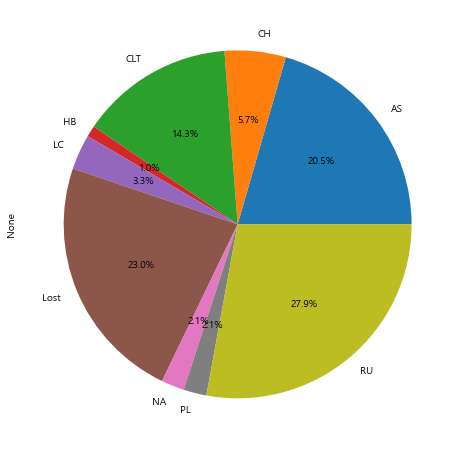

In [83]:
plt.figure(figsize=(8, 8))
segment_27_df.groupby('grade_label').size().plot(kind='pie', autopct='%1.1f%%')

In [84]:
segment_27_df[segment_27_df['grade_label']== 'CLT']

,user_id,oct_purchase,nov_purchase,dec_purchase,jan_purchase,feb_purchase,bfday_purchase,before_bfday_purchase,after_bfday_purchase,oct_first,...,oct_t/f,nov_t/f,dec_t/f,jan_t/f,feb_t/f,recency_grade,frequency_grade,monetary_grade,rfm_segment,grade_label
2,33535391,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,3.00,3.00,1.00,2.00,CLT
10,43713532,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,3.00,3.00,1.00,2.00,CLT
11,45437953,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,3.00,3.00,1.00,2.00,CLT
21,60754030,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,3.00,3.00,1.00,2.00,CLT
23,62833736,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,3.00,3.00,1.00,2.00,CLT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88559,602994326,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,2.00,3.00,1.00,2.00,CLT
88560,602995324,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,2.00,3.00,1.00,2.00,CLT
88563,602996823,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,2.00,3.00,1.00,2.00,CLT
88572,603005703,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,2.00,3.00,1.00,2.00,CLT
